In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle



In [2]:
mutual_funds = pd.read_csv("mutual_funds.csv")

In [3]:
mutual_funds.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [4]:
df = mutual_funds.copy()

In [5]:
df

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,UTI-Unit Linked Insurance Plan – Direct,500,15000,0.96,5068.0,10,Amandeep Chopra,2.47,0.92,7.06,0.44,1.29,4,UTI Mutual Fund,0,Hybrid,Dynamic Asset Allocation or Balanced Advantage,-0.7,13.1,6.2
810,UTI-Value Opportunities Fund,500,5000,1.16,6740.0,10,Vetri Subramaniam,3.21,2.73,15.62,0.9,1.48,6,UTI Mutual Fund,4,Equity,Value Funds,1.7,27.2,12.2
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,NaN
812,WhiteOak Capital Overnight Fund,500,500,0.22,14.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Overnight Mutual Funds,1.7,32.4,13.3


In [6]:
df.shape

(814, 20)

In [7]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [8]:
df.tail()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
809,UTI-Unit Linked Insurance Plan – Direct,500,15000,0.96,5068.0,10,Amandeep Chopra,2.47,0.92,7.06,0.44,1.29,4,UTI Mutual Fund,0,Hybrid,Dynamic Asset Allocation or Balanced Advantage,-0.7,13.1,6.2
810,UTI-Value Opportunities Fund,500,5000,1.16,6740.0,10,Vetri Subramaniam,3.21,2.73,15.62,0.9,1.48,6,UTI Mutual Fund,4,Equity,Value Funds,1.7,27.2,12.2
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,NaN
812,WhiteOak Capital Overnight Fund,500,500,0.22,14.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Overnight Mutual Funds,1.7,32.4,13.3
813,WhiteOak Capital Ultra Short Term Fund,500,500,0.33,141.0,4,Piyush Baranwal,2.81,1.2,0.72,0.47,0.8,1,WhiteOak Capital Mutual Fund,2,Debt,Ultra Short Duration Funds,5.3,4.5,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [10]:
df.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,793.000000,647.000000
mean,528.500000,3047.468059,0.713231,3812.854214,8.319410,4.400491,2.641278,3.921376,18.525347,9.490726
std,369.184517,2514.619513,0.482161,7181.479475,2.640622,1.814741,1.463476,6.675502,12.108476,3.714015
min,0.000000,0.000000,0.000000,2.380000,1.000000,1.000000,0.000000,-19.700000,3.300000,-4.100000
25%,150.000000,500.000000,0.310000,175.250000,6.000000,3.000000,2.000000,1.500000,6.200000,6.700000
50%,500.000000,5000.000000,0.615000,940.500000,10.000000,6.000000,3.000000,4.400000,18.500000,8.900000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,6.000000,4.000000,5.600000,27.100000,12.200000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,6.000000,5.000000,130.800000,71.400000,23.200000


In [11]:
df["scheme_name"]

0      Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...
1                         Aditya Birla SL Arbitrage Fund
2         Aditya Birla SL Asset Allocator FoF-Dir Growth
3       Aditya Birla SL Bal Bhavishya Yojna – Dir Growth
4                Aditya Birla SL Balanced Advantage Fund
                             ...                        
809              UTI-Unit Linked Insurance Plan – Direct
810                         UTI-Value Opportunities Fund
811                         WhiteOak Capital Liquid Fund
812                      WhiteOak Capital Overnight Fund
813               WhiteOak Capital Ultra Short Term Fund
Name: scheme_name, Length: 814, dtype: object

In [12]:

df['scheme_name'] = df['scheme_name'].str.strip()


In [13]:

df['scheme_name'] = df['scheme_name'].str.replace(r'\s*&\s*', ' and ', regex=True)


In [14]:

df['scheme_name'] = df['scheme_name'].str.replace('-', ' ', regex=False)
df['scheme_name'] = df['scheme_name'].str.replace('–', ' ', regex=False)  


In [15]:

exact_dup_count = df.duplicated().sum()
print("🔹 Total exact duplicate rows:", exact_dup_count)



🔹 Total exact duplicate rows: 0


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df[df['scheme_name'].duplicated()]


,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
76,AXIS Retirement Savings Fund,1000,5000,0.41,81.0,3,Jinesh Gopani,1.84,-0.04,5.69,0.83,1.04,5,Axis Mutual Fund,2,Solution Oriented,Retirement Funds,-2.5,10.3,NaN
77,AXIS Retirement Savings Fund,1000,5000,0.65,633.0,3,Jinesh Gopani,1.56,-4.49,13.03,0.78,0.76,6,Axis Mutual Fund,1,Solution Oriented,Retirement Funds,-4.1,14.0,NaN
95,Bank of India Midcap Tax Fund,0,500,0.56,26.0,4,Dhruv Bhatia,2.65,2.58,16.94,0.87,1.36,6,Bank of India Mutual Fund,0,Equity,ELSS Mutual Funds,-4.7,26.0,NaN
242,HDFC Index Fund,100,100,0.20,7457.0,10,Nirman Morakhia,3.24,-1.01,17.02,1.01,1.28,6,HDFC Mutual Fund,3,Other,Index Funds,0.9,26.0,12.0
253,HDFC Retirement Savings Fund,100,100,1.03,932.0,7,Srinivasan Ramamurthy,3.27,3.03,3.23,0.43,1.88,6,HDFC Mutual Fund,4,Solution Oriented,Retirement Funds,8.0,24.5,12.3
254,HDFC Retirement Savings Fund,100,100,1.00,140.0,7,Shobhit Mehrotra,4.39,6.37,11.43,0.73,1.74,4,HDFC Mutual Fund,4,Solution Oriented,Retirement Funds,6.0,10.3,7.8
268,HSBC Corporate Bond Fund,500,5000,0.29,6772.0,10,Shriram Ramanathan,0.67,1.19,3.55,1.68,0.47,3,HSBC Mutual Fund,1,Debt,Corporate Bond Mutual Funds,3.3,6.6,7.6
340,ICICI Pru Retirement Fund,100,5000,1.12,152.0,4,Lalit Kumar,2.43,1.02,4.45,0.64,1.26,6,ICICI Prudential Mutual Fund,3,Solution Oriented,Retirement Funds,1.7,32.4,13.3
341,ICICI Pru Retirement Fund,100,5000,1.00,59.0,4,Lalit Kumar,2.16,2.1,2.28,0.93,1.04,4,ICICI Prudential Mutual Fund,3,Solution Oriented,Retirement Funds,2.0,9.9,NaN
342,ICICI Pru Retirement Fund,100,5000,1.29,175.0,4,Manish Banthia,3.51,8.42,15.15,0.75,1.71,3,ICICI Prudential Mutual Fund,3,Solution Oriented,Retirement Funds,4.6,6.8,NaN


In [18]:
df['min_sip'] = pd.to_numeric(df['min_sip'], errors='coerce')

In [19]:
df["min_sip"].isnull().sum()

np.int64(0)

<Axes: xlabel='min_sip'>

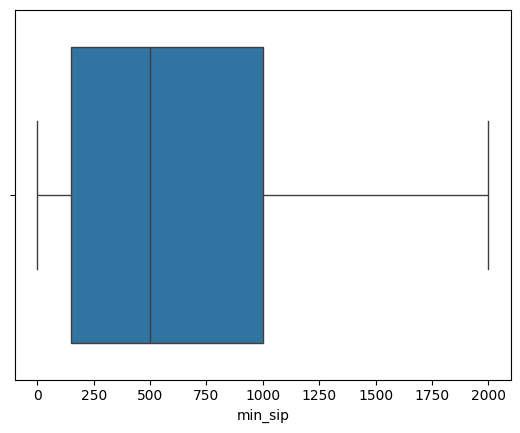

In [20]:
sns.boxplot(x="min_sip",data=df)

In [21]:
df[df["min_sip"] == 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
38,Aditya Birla SL Overnight Fund,0,5000,0.07,13399.0,4,Kaustubh Gupta,0.11,0.58,0.35,0.43,0.02,1,Aditya Birla Sun Life Mutual Fund,3,Debt,Overnight Mutual Funds,5.4,3.9,NaN
63,AXIS FTP Series 104 1112Days,0,0,0.13,110.0,4,Devang Shah,7.27,5.29,-,2.36,2.19,2,Axis Mutual Fund,0,Debt,Fixed Maturity Plans,11.2,14.5,14.0
64,AXIS FTP Series 109 111Days,0,0,0.00,565.0,1,Devang Shah,-,-,-,-,-,3,Axis Mutual Fund,0,Debt,Fixed Maturity Plans,11.2,14.5,14.0
68,AXIS Liquid Fund,0,500,0.15,27226.0,10,Devang Shah,4.54,1.41,0.38,0.78,0.96,2,Axis Mutual Fund,4,Debt,Liquid Mutual Funds,5.7,4.3,5.4
73,AXIS Overnight Fund,0,500,0.05,12566.0,4,Aditya Pagaria,0.49,0.62,0.35,0.44,0.09,1,Axis Mutual Fund,4,Debt,Overnight Mutual Funds,5.4,3.9,NaN
85,Bandhan FTP Sr.179,0,5000,0.05,286.0,4,Harshal Joshi,0.9,9.78,3.98,5.4,0.64,3,Bandhan Mutual Fund,0,Debt,Fixed Maturity Plans,4.4,6.2,NaN
89,Bank of India Credit Risk Fund,0,5000,1.54,161.0,8,Alok Singh,0.91,-13.36,77.72,-31.86,0.38,4,Bank of India Mutual Fund,5,Debt,Credit Risk Funds,130.8,12.8,-4.1
91,Bank of India Liquid Fund,0,5000,0.18,403.0,10,Mithraem Bharucha,4.06,1.38,0.38,0.76,0.92,2,Bank of India Mutual Fund,4,Debt,Liquid Mutual Funds,5.7,4.3,5.3
94,Bank of India Midcap Tax Fund,0,500,0.95,51.0,5,Dhruv Bhatia,2.64,3.13,17.03,0.87,1.38,6,Bank of India Mutual Fund,0,Equity,ELSS Mutual Funds,-4.1,27.1,10.6
95,Bank of India Midcap Tax Fund,0,500,0.56,26.0,4,Dhruv Bhatia,2.65,2.58,16.94,0.87,1.36,6,Bank of India Mutual Fund,0,Equity,ELSS Mutual Funds,-4.7,26.0,NaN


In [22]:
mean_value = df[df['min_sip'] != 0]['min_sip'].mean()



In [23]:
# df['min_sip'] = df['min_sip'].replace(0, mean_value)

df["min_sip"] = df["min_sip"].replace(0,mean_value)

In [24]:
df.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,793.000000,647.000000
mean,557.252591,3047.468059,0.713231,3812.854214,8.319410,4.400491,2.641278,3.921376,18.525347,9.490726
std,347.969499,2514.619513,0.482161,7181.479475,2.640622,1.814741,1.463476,6.675502,12.108476,3.714015
min,99.000000,0.000000,0.000000,2.380000,1.000000,1.000000,0.000000,-19.700000,3.300000,-4.100000
25%,500.000000,500.000000,0.310000,175.250000,6.000000,3.000000,2.000000,1.500000,6.200000,6.700000
50%,500.000000,5000.000000,0.615000,940.500000,10.000000,6.000000,3.000000,4.400000,18.500000,8.900000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,6.000000,4.000000,5.600000,27.100000,12.200000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,6.000000,5.000000,130.800000,71.400000,23.200000


In [25]:
df['min_lumpsum'] = pd.to_numeric(df['min_lumpsum'], errors='coerce')

<Axes: xlabel='min_lumpsum'>

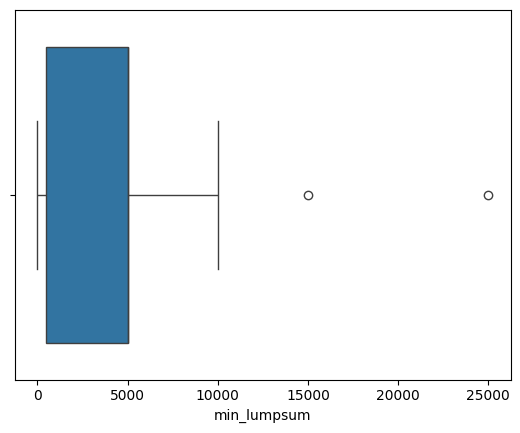

In [26]:
sns.boxplot(x="min_lumpsum",data=df)

In [27]:
df[df["min_lumpsum"] == 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
63,AXIS FTP Series 104 1112Days,557.252591,0,0.13,110.0,4,Devang Shah,7.27,5.29,-,2.36,2.19,2,Axis Mutual Fund,0,Debt,Fixed Maturity Plans,11.2,14.5,14.0
64,AXIS FTP Series 109 111Days,557.252591,0,0.00,565.0,1,Devang Shah,-,-,-,-,-,3,Axis Mutual Fund,0,Debt,Fixed Maturity Plans,11.2,14.5,14.0


In [28]:
median_value = df[df["min_lumpsum"] != 0]["min_lumpsum"].median()

In [29]:
df[df["min_lumpsum"] == 0].replace(0,median_value)

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
63,AXIS FTP Series 104 1112Days,557.252591,5000,0.13,110.0,4,Devang Shah,7.27,5.29,-,2.36,2.19,2,Axis Mutual Fund,5000,Debt,Fixed Maturity Plans,11.2,14.5,14.0
64,AXIS FTP Series 109 111Days,557.252591,5000,5000.00,565.0,1,Devang Shah,-,-,-,-,-,3,Axis Mutual Fund,5000,Debt,Fixed Maturity Plans,11.2,14.5,14.0


In [30]:
df["min_lumpsum"] = df["min_lumpsum"].replace(0,median_value)

In [31]:
df.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,793.000000,647.000000
mean,557.252591,3059.753071,0.713231,3812.854214,8.319410,4.400491,2.641278,3.921376,18.525347,9.490726
std,347.969499,2511.910098,0.482161,7181.479475,2.640622,1.814741,1.463476,6.675502,12.108476,3.714015
min,99.000000,10.000000,0.000000,2.380000,1.000000,1.000000,0.000000,-19.700000,3.300000,-4.100000
25%,500.000000,500.000000,0.310000,175.250000,6.000000,3.000000,2.000000,1.500000,6.200000,6.700000
50%,500.000000,5000.000000,0.615000,940.500000,10.000000,6.000000,3.000000,4.400000,18.500000,8.900000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,6.000000,4.000000,5.600000,27.100000,12.200000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,6.000000,5.000000,130.800000,71.400000,23.200000


In [32]:
df['expense_ratio'] = pd.to_numeric(df['expense_ratio'], errors='coerce')


In [33]:
df["expense_ratio"].isnull().sum()

np.int64(0)

<Axes: xlabel='expense_ratio'>

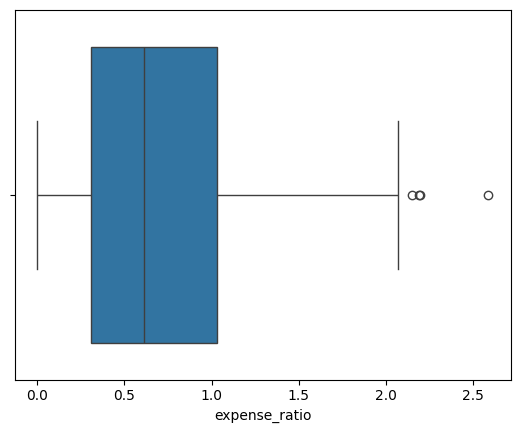

In [34]:
sns.boxplot(x="expense_ratio",data=df)

In [35]:
df[df["expense_ratio"] == 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
64,AXIS FTP Series 109 111Days,557.252591,5000,0.0,565.0,1,Devang Shah,-,-,-,-,-,3,Axis Mutual Fund,0,Debt,Fixed Maturity Plans,11.2,14.5,14.0
632,SBI FMP Series 1 (3668 Days) Direct Growth,557.252591,5000,0.0,40.0,4,Ranjana Gupta,1,9.3,3.62,5.09,0.69,3,SBI Mutual Fund,0,Debt,Fixed Maturity Plans,4.8,6.2,NaN


In [36]:
median_value_of_expense = df[df["expense_ratio"] != 0] ["expense_ratio"].median()

In [37]:
df["expense_ratio"].dtype

dtype('float64')

In [38]:
df["expense_ratio"] = df["expense_ratio"].replace(0,median_value_of_expense)

In [39]:
df[df["expense_ratio"] == 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


In [40]:
df.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,793.000000,647.000000
mean,557.252591,3059.753071,0.714754,3812.854214,8.319410,4.400491,2.641278,3.921376,18.525347,9.490726
std,347.969499,2511.910098,0.480882,7181.479475,2.640622,1.814741,1.463476,6.675502,12.108476,3.714015
min,99.000000,10.000000,0.020000,2.380000,1.000000,1.000000,0.000000,-19.700000,3.300000,-4.100000
25%,500.000000,500.000000,0.312500,175.250000,6.000000,3.000000,2.000000,1.500000,6.200000,6.700000
50%,500.000000,5000.000000,0.620000,940.500000,10.000000,6.000000,3.000000,4.400000,18.500000,8.900000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,6.000000,4.000000,5.600000,27.100000,12.200000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,6.000000,5.000000,130.800000,71.400000,23.200000


In [41]:
df['fund_size_cr'] = pd.to_numeric(df['fund_size_cr'], errors='coerce')

In [42]:
df[df["fund_size_cr"] == 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


In [43]:
df["fund_size_cr"].isnull().sum()

np.int64(0)

<Axes: xlabel='fund_size_cr'>

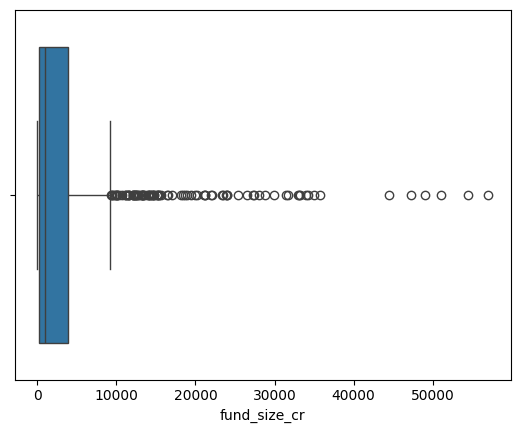

In [44]:
sns.boxplot(x="fund_size_cr",data=df)

In [45]:
df['fund_age_yr'] = pd.to_numeric(df['fund_age_yr'], errors='coerce').astype('Int64')


In [46]:
df[df["fund_age_yr"].isnull()]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


In [47]:
df[df["fund_age_yr"] == 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


In [48]:
df[df["fund_age_yr"] < 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


<Axes: xlabel='fund_age_yr'>

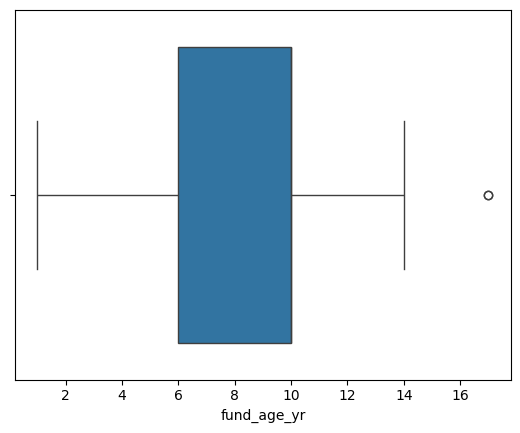

In [49]:
sns.boxplot(x="fund_age_yr",data=df)

In [50]:
df["fund_manager"].isnull().sum()

np.int64(0)

In [51]:
unique_managers = df['fund_manager'].unique()
print(unique_managers)


['Kaustubh Gupta' 'Lovelish Solanki' 'Vinod Narayan Bhat' 'Atul Penkar'
 'Mohit Sharma' 'Dhaval Gala' 'Sunaina da Cunha' 'Kunal Sangoi'
 'Mahesh Patil' 'Dhaval Shah' 'Anil Shah' 'Bhupesh Bameta'
 'Chanchal Khandelwal' 'Vishal Gajwani' 'R Sivakumar' 'Ashish Naik'
 'Anupam Tiwari' 'Aditya Pagaria' 'Shreyash Devalkar' 'Devang Shah'
 'Jinesh Gopani' 'Sachin Relekar' 'Harshal Joshi' 'Alok Singh'
 'Nitin Gosar' 'Mithraem Bharucha' 'Dhruv Bhatia' 'Jitendra Sriram'
 'Neeraj Saxena' 'Sanjay Chawla' 'Prashant Pimple' 'Miten Vora'
 'Pratish Krishnan' 'Mayank Prakash' 'Shiv Chanani' 'Vikram Pamnani'
 'Dhawal Dalal' 'Shridatta Bhandwaldar' 'Avnish Jain' 'Kunal Jain'
 'Vishal Mishra' 'Suman Prasad' 'Kedar Karnik' 'Vikram Chopra'
 'Vivek Ramakrishnan' 'Laukik Bagwe' 'Atul Bhole' 'Rohit Singhania'
 'Vinit Sambre' 'Jay Kothari' 'Karan Mundhara' 'Anil Ghelani'
 'Abhishek Singh' 'Bharat Lahoti' 'Bhavesh Jain' 'Trideep Bhattacharya'
 'Abhishek Gupta' 'Rahul Dedhia' 'Sahil Shah' 'Ajay Argal' 'Umesh Sharma'

In [52]:
manager_counts = df['fund_manager'].value_counts()
print(manager_counts)


fund_manager
Rohit Seksaria    18
R Srinivasan      12
Deepak Agrawal    12
Alok Ranjan       11
Devang Shah       11
                  ..
Miten Vora         1
Neha Raichura      1
Anuj Kapil         1
Vishal Thakker     1
Rajeev Gupta       1
Name: count, Length: 260, dtype: int64


In [53]:
short_forms = df[df['fund_manager'].str.contains(r'\b[A-Z]\.', regex=True)]
print(short_forms)


Empty DataFrame
Columns: [scheme_name, min_sip, min_lumpsum, expense_ratio, fund_size_cr, fund_age_yr, fund_manager, sortino, alpha, sd, beta, sharpe, risk_level, amc_name, rating, category, sub_category, returns_1yr, returns_3yr, returns_5yr]
Index: []


In [54]:
df['fund_manager'] = df['fund_manager'].str.replace('&', ',', regex=False)
df['fund_manager'] = df['fund_manager'].str.replace(r'\s*,\s*', ', ', regex=True)


In [55]:
df['fund_manager'] = df['fund_manager'].str.strip()


In [56]:
df.duplicated().sum()

np.int64(0)

In [57]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi Mgr FoF Dir ...,100.0,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000.0,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF Dir Growth,1000.0,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna Dir Growth,500.0,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100.0,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [58]:
df["sortino"].isnull().sum()

np.int64(0)

In [59]:
df[df["sortino"] == 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


In [60]:
df["sortino"]

0       0.32
1       1.33
2       3.44
3       2.18
4       3.69
       ...  
809     2.47
810     3.21
811    -0.42
812    -0.42
813     2.81
Name: sortino, Length: 814, dtype: object

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    float64
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    Int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [62]:
cols = ['sortino', 'alpha', 'sd', 'beta', 'sharpe']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    float64
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    Int64  
 6   fund_manager   814 non-null    object 
 7   sortino        791 non-null    float64
 8   alpha          772 non-null    float64
 9   sd             790 non-null    float64
 10  beta           772 non-null    float64
 11  sharpe         791 non-null    float64
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [64]:
df["sortino"].isnull().sum()

np.int64(23)

In [65]:
df[df["sortino"].isnull()]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
61,AXIS Floater Fund,1000.000000,5000,0.16,416.0,2,Aditya Pagaria,NaN,NaN,NaN,NaN,NaN,2,Axis Mutual Fund,2,Debt,Floater Mutual Funds,5.8,NaN,NaN
64,AXIS FTP Series 109 111Days,557.252591,5000,0.62,565.0,1,Devang Shah,NaN,NaN,NaN,NaN,NaN,3,Axis Mutual Fund,0,Debt,Fixed Maturity Plans,11.2,14.5,14.0
104,Baroda BNP Paribas Banking and PSU Bond Fund,500.000000,5000,0.39,40.0,2,Prashant Pimple,NaN,NaN,NaN,NaN,NaN,2,Baroda BNP Paribas Mutual Fund,2,Debt,Banking and PSU Mutual Funds,2.5,NaN,NaN
125,BHARAT Bond FOF April 2025 Direct Growth,500.000000,1000,0.06,3912.0,3,Dhawal Dalal,NaN,NaN,NaN,NaN,NaN,2,Edelweiss Mutual Fund,2,Other,FoFs Domestic,2.6,NaN,NaN
154,DSP Floater Fund,500.000000,500,0.24,983.0,2,Kedar Karnik,NaN,NaN,NaN,NaN,NaN,2,DSP Mutual Fund,1,Debt,Floater Mutual Funds,4.4,NaN,NaN
398,Invesco India Medium Duration Fund,1000.000000,1000,0.40,306.0,2,Vikas Garg,NaN,NaN,NaN,NaN,NaN,3,Invesco Mutual Fund,2,Debt,Medium Duration Funds,3.5,NaN,NaN
411,ITI Banking and PSU Debt Fund,500.000000,5000,0.15,27.0,2,Vikrant Mehta,NaN,NaN,NaN,NaN,NaN,2,ITI Mutual Fund,5,Debt,Banking and PSU Mutual Funds,5.4,NaN,NaN
412,ITI Dynamic Bond Fund,500.000000,5000,0.14,57.0,2,Vikrant Mehta,NaN,NaN,NaN,NaN,NaN,2,ITI Mutual Fund,5,Debt,Dynamic Bond,5.7,NaN,NaN
417,ITI Ultra Short Duration Fund,500.000000,5000,0.10,119.0,2,Vikrant Mehta,NaN,NaN,NaN,NaN,NaN,2,ITI Mutual Fund,2,Debt,Ultra Short Duration Funds,5.3,NaN,NaN
461,L and T Focused Equity Fund,500.000000,5000,1.09,946.0,4,Venugopal Manghat,NaN,NaN,NaN,NaN,NaN,6,L&T Mutual Fund,3,Equity,Focused Funds,-0.7,33.7,11.3


<Axes: xlabel='sortino'>

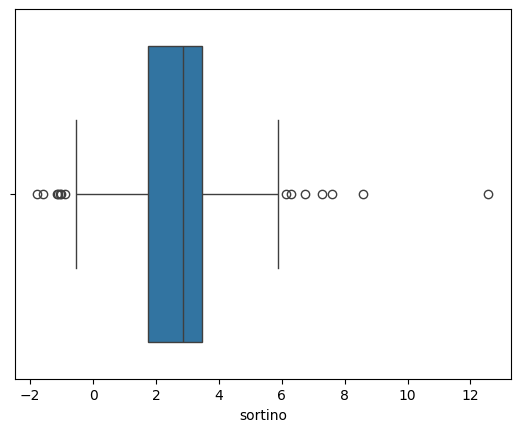

In [66]:
sns.boxplot(x="sortino",data=df)

In [67]:
df[df["sortino"] == 0].count()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [68]:
df[df["sortino"] < 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
86,Bank of India Arbitrage Fund,1000.000000,5000,0.98,12.00,5,Alok Singh,-1.14,0.24,0.60,0.52,-0.78,1,Bank of India Mutual Fund,1,Hybrid,Arbitrage Mutual Funds,4.2,3.4,NaN
216,Franklin India Overnight Fund,500.000000,5000,0.10,152.00,4,Pallab Roy,-0.89,0.49,0.35,0.41,-0.18,1,Franklin Templeton Mutual Fund,2,Debt,Overnight Mutual Funds,5.3,3.8,NaN
251,HDFC Overnight Fund,300.000000,100,0.10,20146.00,10,Anil Bamboli,-0.53,0.53,0.35,0.42,-0.09,1,HDFC Mutual Fund,2,Debt,Overnight Mutual Funds,5.3,3.8,4.6
334,ICICI Pru Overnight Fund,500.000000,100,0.10,12837.00,4,Rahul Goswami,-0.25,0.54,0.35,0.42,-0.05,1,ICICI Prudential Mutual Fund,3,Debt,Overnight Mutual Funds,5.4,3.9,NaN
373,Indiabulls Arbitrage Fund,1000.000000,500,0.58,14.00,8,Sumit Bhatnagar,-1.04,0.18,0.67,0.54,-0.82,1,Indiabulls Mutual Fund,2,Hybrid,Arbitrage Mutual Funds,4.3,3.3,4.5
378,Indiabulls Overnight Fund,500.000000,500,0.18,42.00,4,Karan Singh,-1.77,0.40,0.33,0.39,-0.36,1,Indiabulls Mutual Fund,1,Debt,Overnight Mutual Funds,5.2,3.8,NaN
402,Invesco India Overnight Fund,100.000000,1000,0.09,337.00,3,Krishna Cheemalapati,-0.30,0.55,0.35,0.42,-0.06,1,Invesco Mutual Fund,3,Debt,Overnight Mutual Funds,5.3,3.8,NaN
409,ITI Arbitrage Fund,500.000000,5000,0.22,7.04,4,Vikrant Mehta,-1.02,-0.04,0.65,0.31,-0.71,1,ITI Mutual Fund,1,Hybrid,Arbitrage Mutual Funds,3.9,3.3,NaN
413,ITI Liquid Fund,500.000000,5000,0.09,31.00,4,Vikrant Mehta,-0.02,0.63,0.37,0.47,0.00,1,ITI Mutual Fund,2,Debt,Liquid Mutual Funds,5.5,3.9,NaN
415,ITI Overnight Fund,500.000000,5000,0.08,26.00,3,Vikrant Mehta,-1.11,0.48,0.34,0.42,-0.22,1,ITI Mutual Fund,1,Debt,Overnight Mutual Funds,5.2,3.8,NaN


In [69]:
df["alpha"].isnull().sum()

np.int64(42)

<Axes: xlabel='alpha'>

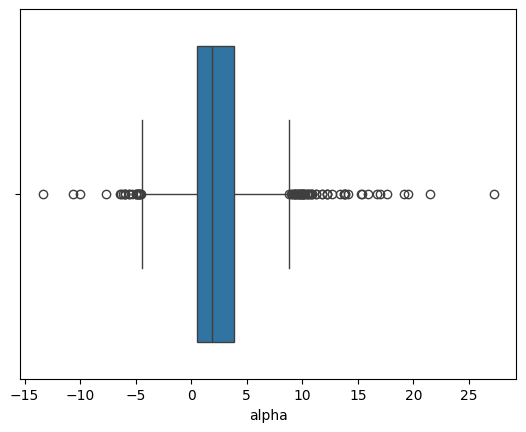

In [70]:
sns.boxplot(x="alpha",data=df)

In [71]:
df[df["alpha"] == 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
526,Motilal Oswal Nifty Bank Index Fund,500.0,500,0.21,332.0,4,Swapnil Mayekar,2.02,0.0,25.4,1.0,0.95,6,Motilal Oswal Mutual Fund,2,Other,Index Funds,10.8,25.0,NaN


In [72]:
df[df["alpha"] < 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
3,Aditya Birla SL Bal Bhavishya Yojna Dir Growth,500.000000,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.90,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
13,Aditya Birla SL Equity Advantage Fund,1000.000000,1000,1.14,4836.0,10,Atul Penkar,2.21,-2.06,17.61,0.98,1.16,6,Aditya Birla Sun Life Mutual Fund,1,Equity,Large & Mid Cap Funds,-9.9,22.3,7.9
16,Aditya Birla SL Flexi Cap Fund,100.000000,100,0.86,15449.0,10,Anil Shah,3.40,-1.46,16.60,0.96,1.27,6,Aditya Birla Sun Life Mutual Fund,3,Equity,Flexi Cap Funds,-2.1,25.0,10.4
18,Aditya Birla SL Focused Equity Fund,1000.000000,1000,1.06,5633.0,10,Mahesh Patil,3.24,-1.14,16.09,0.95,1.26,6,Aditya Birla Sun Life Mutual Fund,3,Equity,Focused Funds,-0.7,24.0,10.7
24,Aditya Birla SL Gold Fund,100.000000,100,0.15,278.0,10,Lovelish Solanki,1.07,-0.57,13.89,0.97,0.45,5,Aditya Birla Sun Life Mutual Fund,2,Other,FoFs Domestic,11.8,12.1,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,UTI Long Term Equity Fund,500.000000,500,0.95,2797.0,10,Vetri Subramaniam,2.98,-0.52,16.16,0.92,1.31,6,UTI Mutual Fund,3,Equity,ELSS Mutual Funds,-2.9,24.5,10.9
794,UTI Mastershare Direct Growth,500.000000,100,0.97,10312.0,10,Karthikraj Lakshmanan,3.28,-0.57,15.87,0.93,1.29,6,UTI Mutual Fund,4,Equity,Large Cap Mutual Funds,-2.0,24.2,11.5
797,UTI MNC Fund,500.000000,5000,1.24,2366.0,10,Swati Kulkarni,2.91,-0.64,12.33,0.62,1.14,6,UTI Mutual Fund,0,Equity,Sectoral / Thematic Mutual Funds,3.3,18.1,7.9
800,UTI Nifty 50 Index Fund,500.000000,5000,0.20,9475.0,10,Sharwan Kumar Goyal,3.49,-0.60,16.80,1.00,1.31,6,UTI Mutual Fund,3,Other,Index Funds,0.9,26.2,12.0


In [73]:
df["sd"].isnull().sum()

np.int64(24)

<Axes: xlabel='sd'>

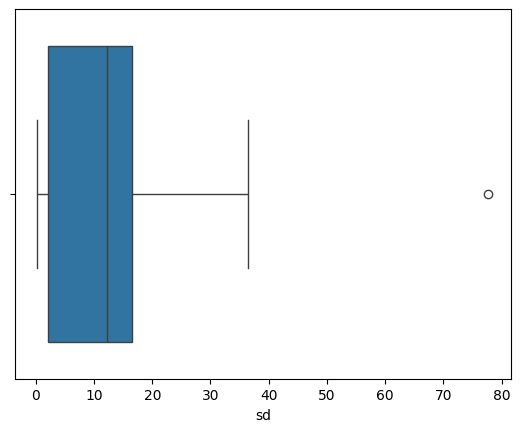

In [74]:
sns.boxplot(x="sd",data=df)

In [75]:
df[df["sd"] == 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


In [76]:
df[df["sd"] < 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


In [77]:
df["beta"].isnull().sum()

np.int64(42)

<Axes: xlabel='beta'>

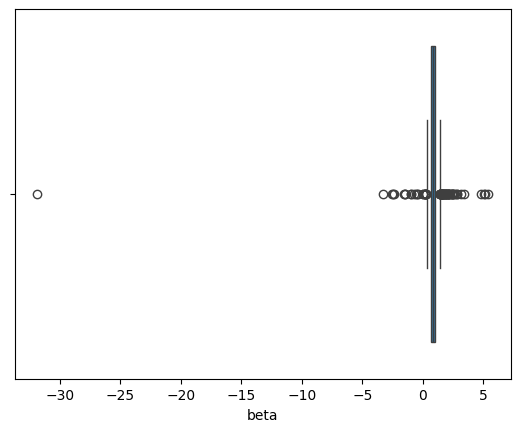

In [78]:
sns.boxplot(x="beta",data=df)

In [79]:
df["sharpe"].isnull().sum()

np.int64(23)

<Axes: xlabel='sharpe'>

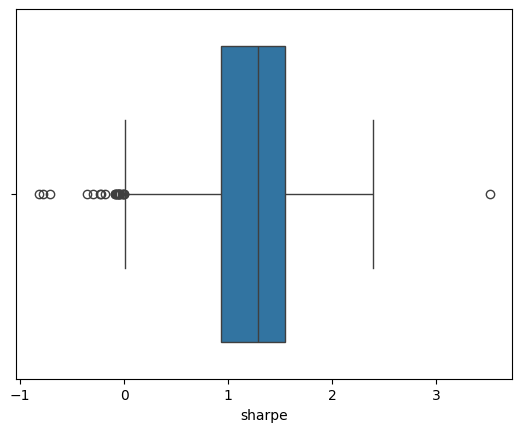

In [80]:
sns.boxplot(x="sharpe",data=df)

In [81]:
df[df["sharpe"] == 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
139,Canara Robeco Overnight Fund,557.252591,5000,0.10,216.0,4,Suman Prasad,0.03,0.61,0.34,0.45,0.0,1,Canara Robeco Mutual Fund,2,Debt,Overnight Mutual Funds,5.3,3.9,NaN
413,ITI Liquid Fund,500.000000,5000,0.09,31.0,4,Vikrant Mehta,-0.02,0.63,0.37,0.47,0.0,1,ITI Mutual Fund,2,Debt,Liquid Mutual Funds,5.5,3.9,NaN


In [82]:
df[df["sharpe"] < 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
86,Bank of India Arbitrage Fund,1000.000000,5000,0.98,12.00,5,Alok Singh,-1.14,0.24,0.60,0.52,-0.78,1,Bank of India Mutual Fund,1,Hybrid,Arbitrage Mutual Funds,4.2,3.4,NaN
216,Franklin India Overnight Fund,500.000000,5000,0.10,152.00,4,Pallab Roy,-0.89,0.49,0.35,0.41,-0.18,1,Franklin Templeton Mutual Fund,2,Debt,Overnight Mutual Funds,5.3,3.8,NaN
251,HDFC Overnight Fund,300.000000,100,0.10,20146.00,10,Anil Bamboli,-0.53,0.53,0.35,0.42,-0.09,1,HDFC Mutual Fund,2,Debt,Overnight Mutual Funds,5.3,3.8,4.6
334,ICICI Pru Overnight Fund,500.000000,100,0.10,12837.00,4,Rahul Goswami,-0.25,0.54,0.35,0.42,-0.05,1,ICICI Prudential Mutual Fund,3,Debt,Overnight Mutual Funds,5.4,3.9,NaN
373,Indiabulls Arbitrage Fund,1000.000000,500,0.58,14.00,8,Sumit Bhatnagar,-1.04,0.18,0.67,0.54,-0.82,1,Indiabulls Mutual Fund,2,Hybrid,Arbitrage Mutual Funds,4.3,3.3,4.5
378,Indiabulls Overnight Fund,500.000000,500,0.18,42.00,4,Karan Singh,-1.77,0.40,0.33,0.39,-0.36,1,Indiabulls Mutual Fund,1,Debt,Overnight Mutual Funds,5.2,3.8,NaN
402,Invesco India Overnight Fund,100.000000,1000,0.09,337.00,3,Krishna Cheemalapati,-0.30,0.55,0.35,0.42,-0.06,1,Invesco Mutual Fund,3,Debt,Overnight Mutual Funds,5.3,3.8,NaN
409,ITI Arbitrage Fund,500.000000,5000,0.22,7.04,4,Vikrant Mehta,-1.02,-0.04,0.65,0.31,-0.71,1,ITI Mutual Fund,1,Hybrid,Arbitrage Mutual Funds,3.9,3.3,NaN
415,ITI Overnight Fund,500.000000,5000,0.08,26.00,3,Vikrant Mehta,-1.11,0.48,0.34,0.42,-0.22,1,ITI Mutual Fund,1,Debt,Overnight Mutual Funds,5.2,3.8,NaN
418,JM Arbitrage Fund,500.000000,5000,0.36,60.00,10,Asit Bhandarkar,-0.31,0.56,0.72,0.55,-0.23,1,JM Financial Mutual Fund,1,Hybrid,Arbitrage Mutual Funds,5.4,3.7,4.5


In [83]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi Mgr FoF Dir ...,100.0,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000.0,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.10,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF Dir Growth,1000.0,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna Dir Growth,500.0,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.90,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100.0,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [84]:
# Numeric columns (with outliers)
for col in ['sortino', 'alpha', 'sd', 'beta','sharpe']:
        df[col] = df[col].fillna(df[col].median())

In [85]:
df.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [86]:
df["risk_level"]

0      3
1      1
2      5
3      6
4      6
      ..
809    4
810    6
811    1
812    1
813    1
Name: risk_level, Length: 814, dtype: int64

In [87]:
df.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,814.000000,814.000000,814.000000,814.000000,814.0,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,793.000000,647.000000
mean,557.252591,3059.753071,0.714754,3812.854214,8.31941,2.658784,2.472064,10.332469,0.824189,1.206609,4.400491,2.641278,3.921376,18.525347,9.490726
std,347.969499,2511.910098,0.480882,7181.479475,2.640622,1.372866,3.850843,7.697244,1.275615,0.528980,1.814741,1.463476,6.675502,12.108476,3.714015
min,99.000000,10.000000,0.020000,2.380000,1.0,-1.770000,-13.360000,0.270000,-31.860000,-0.820000,1.000000,0.000000,-19.700000,3.300000,-4.100000
25%,500.000000,500.000000,0.312500,175.250000,6.0,1.810000,0.570000,2.222500,0.710000,0.932500,3.000000,2.000000,1.500000,6.200000,6.700000
50%,500.000000,5000.000000,0.620000,940.500000,10.0,2.870000,1.855000,12.300000,0.860000,1.290000,6.000000,3.000000,4.400000,18.500000,8.900000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.0,3.460000,3.727500,16.397500,0.960000,1.540000,6.000000,4.000000,5.600000,27.100000,12.200000
max,2000.000000,25000.000000,2.590000,57052.000000,17.0,12.570000,27.240000,77.720000,5.400000,3.520000,6.000000,5.000000,130.800000,71.400000,23.200000


In [88]:
df[df["risk_level"] == 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


In [89]:
df[df["risk_level"] < 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


In [90]:
df["risk_level"].isnull().sum()

np.int64(0)

In [91]:
df['risk_level'] = pd.to_numeric(df['risk_level'], errors='coerce').astype('Int64')


<Axes: xlabel='risk_level'>

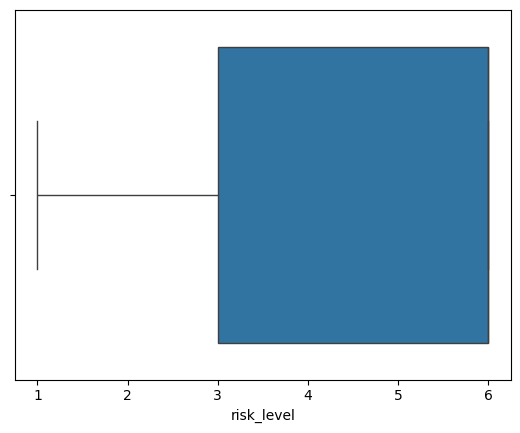

In [92]:
sns.boxplot(x="risk_level",data=df)

In [93]:
df.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [94]:
df['amc_name'] = df['amc_name'].str.strip()


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    float64
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    Int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    float64
 8   alpha          814 non-null    float64
 9   sd             814 non-null    float64
 10  beta           814 non-null    float64
 11  sharpe         814 non-null    float64
 12  risk_level     814 non-null    Int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [96]:


df['rating'] = df['rating'].round(0).astype('Int64')



In [97]:
df['rating'].dtype

Int64Dtype()

In [98]:
df[df["rating"] == 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
7,Aditya Birla SL CEF Global Agri Plan Direct ...,1000.0,1000,1.29,15.0,10,Vinod Narayan Bhat,1.42,1.855,20.18,0.86,1.06,6,Aditya Birla Sun Life Mutual Fund,0,Equity,Sectoral / Thematic Mutual Funds,-10.3,29.4,9.3
10,Aditya Birla SL Digital India Fund,100.0,1000,0.88,3338.0,10,Kunal Sangoi,2.42,9.370,21.12,0.83,1.53,6,Aditya Birla Sun Life Mutual Fund,0,Equity,Sectoral / Thematic Mutual Funds,-14.6,39.8,21.1
11,Aditya Birla SL Dividend Yield Fund,1000.0,1000,1.73,850.0,10,Dhaval Gala,3.78,5.040,15.77,0.85,1.58,6,Aditya Birla Sun Life Mutual Fund,0,Equity,Dividend Yield Funds,6.2,30.5,10.0
23,Aditya Birla SL Global Emerging Oppt Fund,100.0,100,0.70,261.0,10,Vinod Narayan Bhat,0.98,1.855,16.64,0.86,0.70,6,Aditya Birla Sun Life Mutual Fund,0,Other,FoFs Overseas,-5.7,18.8,8.3
29,Aditya Birla SL Inter Equity Plan A Direct G...,1000.0,1000,1.75,108.0,10,Vinod Narayan Bhat,1.28,1.855,13.99,0.86,0.81,6,Aditya Birla Sun Life Mutual Fund,0,Equity,Sectoral / Thematic Mutual Funds,0.9,17.7,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,UTI Healthcare Fund,500.0,5000,1.47,655.0,10,V Srivatsa,1.99,1.120,20.55,0.94,0.91,6,UTI Mutual Fund,0,Equity,Sectoral / Thematic Mutual Funds,-9.0,22.0,12.0
797,UTI MNC Fund,500.0,5000,1.24,2366.0,10,Swati Kulkarni,2.91,-0.640,12.33,0.62,1.14,6,UTI Mutual Fund,0,Equity,Sectoral / Thematic Mutual Funds,3.3,18.1,7.9
804,UTI Retirement Benefit Pension Plan Direct,500.0,500,1.05,3687.0,10,Sunil Patil,3.59,4.370,6.72,0.45,1.88,5,UTI Mutual Fund,0,Solution Oriented,Retirement Funds,5.2,17.2,7.5
806,UTI Transportation and Logistics Fund,500.0,5000,1.03,1908.0,10,Sachin Trivedi,3.56,10.260,18.98,0.83,1.57,6,UTI Mutual Fund,0,Equity,Sectoral / Thematic Mutual Funds,14.1,32.9,5.1


In [99]:
df[df["rating"] < 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


<Axes: xlabel='rating'>

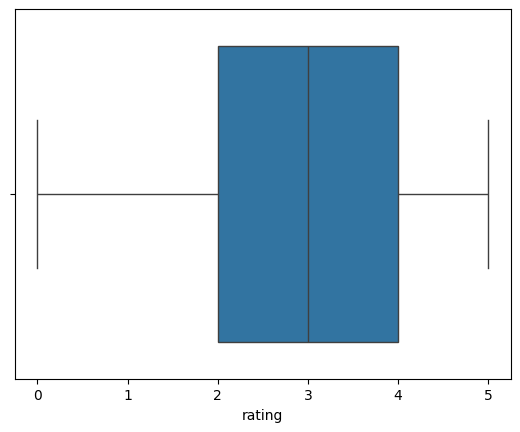

In [100]:
sns.boxplot(x="rating",data=df)

In [101]:
mean_value_for_rating = round(df['rating'].mean())  
df['rating'] = df['rating'].replace(0, mean_value_for_rating)
df['rating'] = df['rating'].astype('Int64')  


In [102]:
df['rating'] = df['rating'].replace(0, df['rating'].mean())


In [103]:
df[df["rating"] == 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


In [104]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df


for col in ['fund_size_cr','sortino','alpha','sd','beta','sharpe']:
    df = remove_outliers_iqr(df, col)

print("\nClean Dataset:\n", df)


Clean Dataset:
                                            scheme_name  min_sip  min_lumpsum  \
1                       Aditya Birla SL Arbitrage Fund   1000.0         1000   
2       Aditya Birla SL Asset Allocator FoF Dir Growth   1000.0         1000   
4              Aditya Birla SL Balanced Advantage Fund    100.0          100   
5    Aditya Birla SL Banking and Financial Services...   1000.0         1000   
7    Aditya Birla SL CEF   Global Agri Plan Direct ...   1000.0         1000   
..                                                 ...      ...          ...   
804       UTI Retirement Benefit Pension Plan   Direct    500.0          500   
805                         UTI Short Term Income Fund    500.0          500   
809            UTI Unit Linked Insurance Plan   Direct    500.0        15000   
810                       UTI Value Opportunities Fund    500.0         5000   
813             WhiteOak Capital Ultra Short Term Fund    500.0          500   

     expense_ratio  fu

<Axes: xlabel='min_lumpsum'>

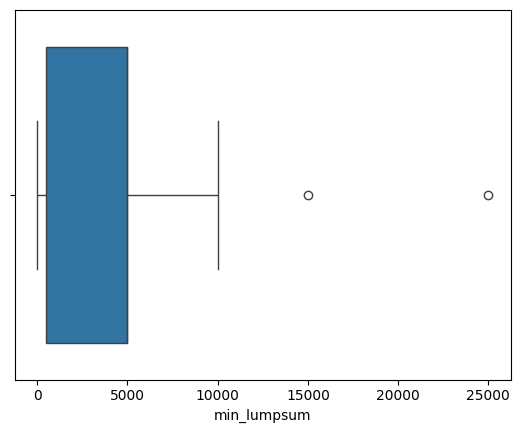

In [105]:
sns.boxplot(data=df,x="min_lumpsum")

In [106]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
1,Aditya Birla SL Arbitrage Fund,1000.0,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.530,0.72,0.56,1.10,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF Dir Growth,1000.0,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.670,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
4,Aditya Birla SL Balanced Advantage Fund,100.0,100,0.61,6386.0,10,Mohit Sharma,3.69,1.990,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7
5,Aditya Birla SL Banking and Financial Services...,1000.0,1000,1.17,2384.0,9,Dhaval Gala,2.07,1.240,25.53,0.96,0.97,6,Aditya Birla Sun Life Mutual Fund,2,Equity,Sectoral / Thematic Mutual Funds,5.3,24.6,9.2
7,Aditya Birla SL CEF Global Agri Plan Direct ...,1000.0,1000,1.29,15.0,10,Vinod Narayan Bhat,1.42,1.855,20.18,0.86,1.06,6,Aditya Birla Sun Life Mutual Fund,3,Equity,Sectoral / Thematic Mutual Funds,-10.3,29.4,9.3


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 1 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    533 non-null    object 
 1   min_sip        533 non-null    float64
 2   min_lumpsum    533 non-null    int64  
 3   expense_ratio  533 non-null    float64
 4   fund_size_cr   533 non-null    float64
 5   fund_age_yr    533 non-null    Int64  
 6   fund_manager   533 non-null    object 
 7   sortino        533 non-null    float64
 8   alpha          533 non-null    float64
 9   sd             533 non-null    float64
 10  beta           533 non-null    float64
 11  sharpe         533 non-null    float64
 12  risk_level     533 non-null    Int64  
 13  amc_name       533 non-null    object 
 14  rating         533 non-null    Int64  
 15  category       533 non-null    object 
 16  sub_category   533 non-null    object 
 17  returns_1yr    533 non-null    float64
 18  returns_3yr    

In [108]:
df['category'].value_counts()


category
Equity               210
Debt                 136
Hybrid                99
Other                 67
Solution Oriented     21
Name: count, dtype: int64

In [109]:
df['category'].unique()


array(['Hybrid', 'Other', 'Equity', 'Debt', 'Solution Oriented'],
      dtype=object)

In [110]:
# Trim spaces
df['category'] = df['category'].str.strip()




In [111]:
# Title case
df['category'] = df['category'].str.title()

In [112]:
df['sub_category'].value_counts()

sub_category
Sectoral / Thematic Mutual Funds                  63
ELSS Mutual Funds                                 33
FoFs Domestic                                     28
Aggressive Hybrid Mutual Funds                    25
Index Funds                                       24
Equity Savings Mutual Funds                       21
Large & Mid Cap Funds                             20
Large Cap Mutual Funds                            19
Ultra Short Duration Funds                        18
Gilt Mutual Funds                                 17
Conservative Hybrid Mutual Funds                  17
Focused Funds                                     16
Arbitrage Mutual Funds                            16
Dynamic Asset Allocation or Balanced Advantage    15
FoFs Overseas                                     15
Dynamic Bond                                      15
Liquid Mutual Funds                               14
Mid Cap Mutual Funds                              14
Corporate Bond Mutual Funds      

In [113]:
for i, sub_category in enumerate(df['sub_category'].unique(), start=1):
    print(i, sub_category)


1 Arbitrage Mutual Funds
2 FoFs Domestic
3 Dynamic Asset Allocation or Balanced Advantage
4 Sectoral / Thematic Mutual Funds
5 Dividend Yield Funds
6 Dynamic Bond
7 Large & Mid Cap Funds
8 Aggressive Hybrid Mutual Funds
9 Equity Savings Mutual Funds
10 Focused Funds
11 FoFs Overseas
12 Gilt Mutual Funds
13 Mid Cap Mutual Funds
14 Index Funds
15 Value Funds
16 Conservative Hybrid Mutual Funds
17 Retirement Funds
18 Short Duration Funds
19 Small Cap Mutual Funds
20 Childrens Funds
21 Corporate Bond Mutual Funds
22 Floater Mutual Funds
23 Fixed Maturity Plans
24 Money Market Funds
25 Medium Duration Funds
26 Low Duration Funds
27 Multi Asset Allocation Mutual Funds
28 Ultra Short Duration Funds
29 Liquid Mutual Funds
30 ELSS Mutual Funds
31 Overnight Mutual Funds
32 Banking and PSU Mutual Funds
33 Large Cap Mutual Funds
34 Multi Cap Funds
35 Flexi Cap Funds
36 Medium to Long Duration Funds
37 Credit Risk Funds
38 Contra Funds


In [114]:
df['sub_category'] = df['sub_category'].str.replace('/', ' and ', regex=False)


In [115]:
df['sub_category'] = df['sub_category'].str.replace('&', ' and ', regex=False)


In [116]:
for i, sub_category in enumerate(df['sub_category'].unique(), start=1):
    print(i, sub_category)


1 Arbitrage Mutual Funds
2 FoFs Domestic
3 Dynamic Asset Allocation or Balanced Advantage
4 Sectoral  and  Thematic Mutual Funds
5 Dividend Yield Funds
6 Dynamic Bond
7 Large  and  Mid Cap Funds
8 Aggressive Hybrid Mutual Funds
9 Equity Savings Mutual Funds
10 Focused Funds
11 FoFs Overseas
12 Gilt Mutual Funds
13 Mid Cap Mutual Funds
14 Index Funds
15 Value Funds
16 Conservative Hybrid Mutual Funds
17 Retirement Funds
18 Short Duration Funds
19 Small Cap Mutual Funds
20 Childrens Funds
21 Corporate Bond Mutual Funds
22 Floater Mutual Funds
23 Fixed Maturity Plans
24 Money Market Funds
25 Medium Duration Funds
26 Low Duration Funds
27 Multi Asset Allocation Mutual Funds
28 Ultra Short Duration Funds
29 Liquid Mutual Funds
30 ELSS Mutual Funds
31 Overnight Mutual Funds
32 Banking and PSU Mutual Funds
33 Large Cap Mutual Funds
34 Multi Cap Funds
35 Flexi Cap Funds
36 Medium to Long Duration Funds
37 Credit Risk Funds
38 Contra Funds


In [117]:
df['sub_category'] = df['sub_category'].str.strip()

In [118]:
df["sub_category"] = df["sub_category"].str.strip()

In [119]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
1,Aditya Birla SL Arbitrage Fund,1000.0,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.530,0.72,0.56,1.10,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF Dir Growth,1000.0,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.670,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
4,Aditya Birla SL Balanced Advantage Fund,100.0,100,0.61,6386.0,10,Mohit Sharma,3.69,1.990,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7
5,Aditya Birla SL Banking and Financial Services...,1000.0,1000,1.17,2384.0,9,Dhaval Gala,2.07,1.240,25.53,0.96,0.97,6,Aditya Birla Sun Life Mutual Fund,2,Equity,Sectoral and Thematic Mutual Funds,5.3,24.6,9.2
7,Aditya Birla SL CEF Global Agri Plan Direct ...,1000.0,1000,1.29,15.0,10,Vinod Narayan Bhat,1.42,1.855,20.18,0.86,1.06,6,Aditya Birla Sun Life Mutual Fund,3,Equity,Sectoral and Thematic Mutual Funds,-10.3,29.4,9.3


In [120]:
# returns_1yr	returns_3yr	returns_5y

In [121]:
df["returns_1yr"].isnull().sum()

np.int64(0)

In [122]:
df.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      111
dtype: int64

In [123]:
df["returns_3yr"].isnull().sum()

np.int64(21)

In [124]:
df["returns_5yr"].isnull().sum()

np.int64(111)

<Axes: xlabel='returns_1yr'>

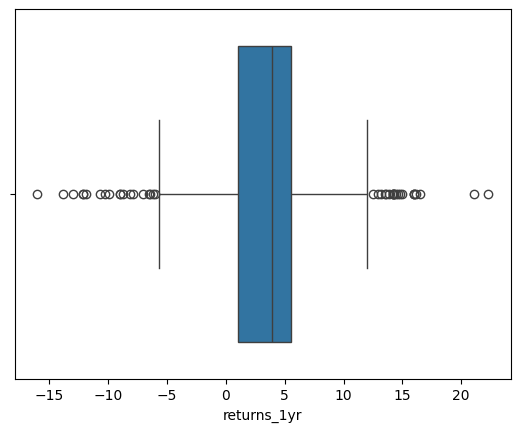

In [125]:
sns.boxplot(x="returns_1yr",data=df)

<Axes: xlabel='returns_3yr'>

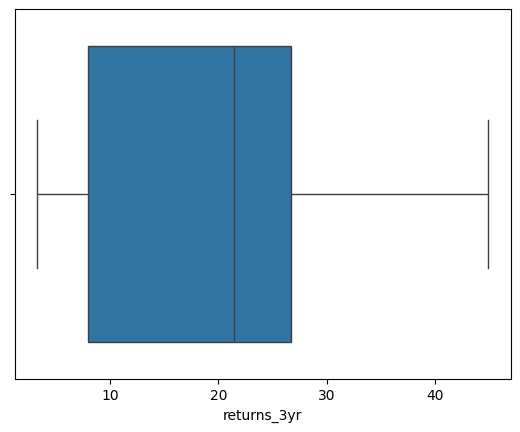

In [126]:
sns.boxplot(x="returns_3yr",data=df)

<Axes: xlabel='returns_5yr'>

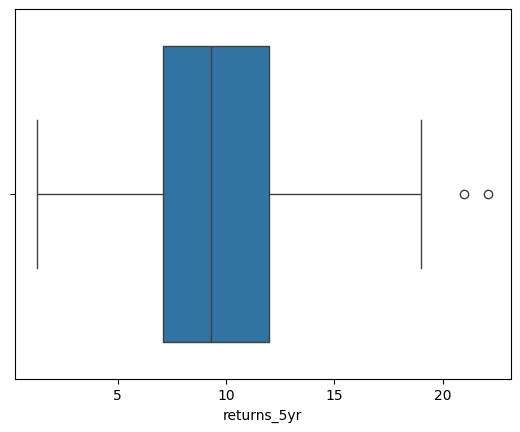

In [127]:
sns.boxplot(x="returns_5yr",data=df)

In [128]:
#returns_1yr	returns_3yr	returns_5y

In [129]:

# Numeric columns (with outliers)
for col in ["returns_3yr","returns_5yr"]:
        df[col] = df[col].fillna(df[col].median())


In [130]:
df.isnull().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [131]:
df[df["returns_1yr"] == 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
279,HSBC Large Cap Fund,500.0,5000,1.26,1405.0,10,Neelotpal Sahai,2.60,-2.34,16.62,0.97,1.18,6,HSBC Mutual Fund,2,Equity,Large Cap Mutual Funds,0.0,23.3,10.6
576,Nippon India Value Fund,100.0,500,1.21,4641.0,10,Meenakshi Dawar,3.34,4.25,16.97,0.97,1.54,6,Nippon India Mutual Fund,3,Equity,Value Funds,0.0,30.3,12.2


In [132]:
df[df["returns_1yr"] < 1]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
7,Aditya Birla SL CEF Global Agri Plan Direct ...,1000.0,1000,1.29,15.0,10,Vinod Narayan Bhat,1.42,1.855,20.18,0.86,1.06,6,Aditya Birla Sun Life Mutual Fund,3,Equity,Sectoral and Thematic Mutual Funds,-10.3,29.4,9.3
13,Aditya Birla SL Equity Advantage Fund,1000.0,1000,1.14,4836.0,10,Atul Penkar,2.21,-2.060,17.61,0.98,1.16,6,Aditya Birla Sun Life Mutual Fund,1,Equity,Large and Mid Cap Funds,-9.9,22.3,7.9
14,Aditya Birla SL Equity Hybrid ’95 Fund,100.0,100,1.01,7046.0,10,Mahesh Patil,2.54,1.430,12.84,0.85,1.33,6,Aditya Birla Sun Life Mutual Fund,2,Hybrid,Aggressive Hybrid Mutual Funds,-5.7,20.4,7.7
15,Aditya Birla SL Equity Savings Fund,1000.0,1000,1.21,451.0,8,Dhaval Shah,2.55,1.110,6.83,0.99,1.20,4,Aditya Birla Sun Life Mutual Fund,2,Hybrid,Equity Savings Mutual Funds,0.8,11.7,6.9
18,Aditya Birla SL Focused Equity Fund,1000.0,1000,1.06,5633.0,10,Mahesh Patil,3.24,-1.140,16.09,0.95,1.26,6,Aditya Birla Sun Life Mutual Fund,3,Equity,Focused Funds,-0.7,24.0,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,UTI Healthcare Fund,500.0,5000,1.47,655.0,10,V Srivatsa,1.99,1.120,20.55,0.94,0.91,6,UTI Mutual Fund,3,Equity,Sectoral and Thematic Mutual Funds,-9.0,22.0,12.0
790,UTI India Consumer Fund,500.0,5000,1.80,436.0,10,Vishal Chopda,2.29,-1.440,13.74,0.71,1.09,6,UTI Mutual Fund,1,Equity,Sectoral and Thematic Mutual Funds,-0.5,18.0,8.4
793,UTI Long Term Equity Fund,500.0,500,0.95,2797.0,10,Vetri Subramaniam,2.98,-0.520,16.16,0.92,1.31,6,UTI Mutual Fund,3,Equity,ELSS Mutual Funds,-2.9,24.5,10.9
796,UTI Mid Cap Fund,500.0,5000,0.99,7077.0,10,Ankit Agarwal,3.49,1.030,16.43,0.89,1.65,6,UTI Mutual Fund,3,Equity,Mid Cap Mutual Funds,0.4,31.1,11.4


In [133]:
df[df["returns_3yr"] == 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


In [134]:
df[df["returns_1yr"] < 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
7,Aditya Birla SL CEF Global Agri Plan Direct ...,1000.0,1000,1.29,15.0,10,Vinod Narayan Bhat,1.42,1.855,20.18,0.86,1.06,6,Aditya Birla Sun Life Mutual Fund,3,Equity,Sectoral and Thematic Mutual Funds,-10.3,29.4,9.3
13,Aditya Birla SL Equity Advantage Fund,1000.0,1000,1.14,4836.0,10,Atul Penkar,2.21,-2.060,17.61,0.98,1.16,6,Aditya Birla Sun Life Mutual Fund,1,Equity,Large and Mid Cap Funds,-9.9,22.3,7.9
14,Aditya Birla SL Equity Hybrid ’95 Fund,100.0,100,1.01,7046.0,10,Mahesh Patil,2.54,1.430,12.84,0.85,1.33,6,Aditya Birla Sun Life Mutual Fund,2,Hybrid,Aggressive Hybrid Mutual Funds,-5.7,20.4,7.7
18,Aditya Birla SL Focused Equity Fund,1000.0,1000,1.06,5633.0,10,Mahesh Patil,3.24,-1.140,16.09,0.95,1.26,6,Aditya Birla Sun Life Mutual Fund,3,Equity,Focused Funds,-0.7,24.0,10.7
23,Aditya Birla SL Global Emerging Oppt Fund,100.0,100,0.70,261.0,10,Vinod Narayan Bhat,0.98,1.855,16.64,0.86,0.70,6,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Overseas,-5.7,18.8,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,UTI Dividend Yield Fund,500.0,5000,1.45,2786.0,10,Swati Kulkarni,2.93,1.900,14.96,0.82,1.41,6,UTI Mutual Fund,3,Equity,Dividend Yield Funds,-1.5,26.8,11.3
788,UTI Healthcare Fund,500.0,5000,1.47,655.0,10,V Srivatsa,1.99,1.120,20.55,0.94,0.91,6,UTI Mutual Fund,3,Equity,Sectoral and Thematic Mutual Funds,-9.0,22.0,12.0
790,UTI India Consumer Fund,500.0,5000,1.80,436.0,10,Vishal Chopda,2.29,-1.440,13.74,0.71,1.09,6,UTI Mutual Fund,1,Equity,Sectoral and Thematic Mutual Funds,-0.5,18.0,8.4
793,UTI Long Term Equity Fund,500.0,500,0.95,2797.0,10,Vetri Subramaniam,2.98,-0.520,16.16,0.92,1.31,6,UTI Mutual Fund,3,Equity,ELSS Mutual Funds,-2.9,24.5,10.9


In [135]:
df[df["returns_5yr"] == 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


In [136]:
df[df["returns_1yr"] < 0]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
7,Aditya Birla SL CEF Global Agri Plan Direct ...,1000.0,1000,1.29,15.0,10,Vinod Narayan Bhat,1.42,1.855,20.18,0.86,1.06,6,Aditya Birla Sun Life Mutual Fund,3,Equity,Sectoral and Thematic Mutual Funds,-10.3,29.4,9.3
13,Aditya Birla SL Equity Advantage Fund,1000.0,1000,1.14,4836.0,10,Atul Penkar,2.21,-2.060,17.61,0.98,1.16,6,Aditya Birla Sun Life Mutual Fund,1,Equity,Large and Mid Cap Funds,-9.9,22.3,7.9
14,Aditya Birla SL Equity Hybrid ’95 Fund,100.0,100,1.01,7046.0,10,Mahesh Patil,2.54,1.430,12.84,0.85,1.33,6,Aditya Birla Sun Life Mutual Fund,2,Hybrid,Aggressive Hybrid Mutual Funds,-5.7,20.4,7.7
18,Aditya Birla SL Focused Equity Fund,1000.0,1000,1.06,5633.0,10,Mahesh Patil,3.24,-1.140,16.09,0.95,1.26,6,Aditya Birla Sun Life Mutual Fund,3,Equity,Focused Funds,-0.7,24.0,10.7
23,Aditya Birla SL Global Emerging Oppt Fund,100.0,100,0.70,261.0,10,Vinod Narayan Bhat,0.98,1.855,16.64,0.86,0.70,6,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Overseas,-5.7,18.8,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,UTI Dividend Yield Fund,500.0,5000,1.45,2786.0,10,Swati Kulkarni,2.93,1.900,14.96,0.82,1.41,6,UTI Mutual Fund,3,Equity,Dividend Yield Funds,-1.5,26.8,11.3
788,UTI Healthcare Fund,500.0,5000,1.47,655.0,10,V Srivatsa,1.99,1.120,20.55,0.94,0.91,6,UTI Mutual Fund,3,Equity,Sectoral and Thematic Mutual Funds,-9.0,22.0,12.0
790,UTI India Consumer Fund,500.0,5000,1.80,436.0,10,Vishal Chopda,2.29,-1.440,13.74,0.71,1.09,6,UTI Mutual Fund,1,Equity,Sectoral and Thematic Mutual Funds,-0.5,18.0,8.4
793,UTI Long Term Equity Fund,500.0,500,0.95,2797.0,10,Vetri Subramaniam,2.98,-0.520,16.16,0.92,1.31,6,UTI Mutual Fund,3,Equity,ELSS Mutual Funds,-2.9,24.5,10.9


In [137]:
# Print unique sub_categories with numbering
for i, sub_category in enumerate(df['sub_category'].unique(), start=1):
    print(i, sub_category)

# Print total number of unique sub_categories
print("Total unique sub_categories:", df['sub_category'].nunique())


1 Arbitrage Mutual Funds
2 FoFs Domestic
3 Dynamic Asset Allocation or Balanced Advantage
4 Sectoral  and  Thematic Mutual Funds
5 Dividend Yield Funds
6 Dynamic Bond
7 Large  and  Mid Cap Funds
8 Aggressive Hybrid Mutual Funds
9 Equity Savings Mutual Funds
10 Focused Funds
11 FoFs Overseas
12 Gilt Mutual Funds
13 Mid Cap Mutual Funds
14 Index Funds
15 Value Funds
16 Conservative Hybrid Mutual Funds
17 Retirement Funds
18 Short Duration Funds
19 Small Cap Mutual Funds
20 Childrens Funds
21 Corporate Bond Mutual Funds
22 Floater Mutual Funds
23 Fixed Maturity Plans
24 Money Market Funds
25 Medium Duration Funds
26 Low Duration Funds
27 Multi Asset Allocation Mutual Funds
28 Ultra Short Duration Funds
29 Liquid Mutual Funds
30 ELSS Mutual Funds
31 Overnight Mutual Funds
32 Banking and PSU Mutual Funds
33 Large Cap Mutual Funds
34 Multi Cap Funds
35 Flexi Cap Funds
36 Medium to Long Duration Funds
37 Credit Risk Funds
38 Contra Funds
Total unique sub_categories: 38


In [138]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
1,Aditya Birla SL Arbitrage Fund,1000.0,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.530,0.72,0.56,1.10,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF Dir Growth,1000.0,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.670,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
4,Aditya Birla SL Balanced Advantage Fund,100.0,100,0.61,6386.0,10,Mohit Sharma,3.69,1.990,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7
5,Aditya Birla SL Banking and Financial Services...,1000.0,1000,1.17,2384.0,9,Dhaval Gala,2.07,1.240,25.53,0.96,0.97,6,Aditya Birla Sun Life Mutual Fund,2,Equity,Sectoral and Thematic Mutual Funds,5.3,24.6,9.2
7,Aditya Birla SL CEF Global Agri Plan Direct ...,1000.0,1000,1.29,15.0,10,Vinod Narayan Bhat,1.42,1.855,20.18,0.86,1.06,6,Aditya Birla Sun Life Mutual Fund,3,Equity,Sectoral and Thematic Mutual Funds,-10.3,29.4,9.3


In [139]:
df["category"].value_counts()

category
Equity               210
Debt                 136
Hybrid                99
Other                 67
Solution Oriented     21
Name: count, dtype: int64

In [140]:
df["category"].value_counts(normalize=True)*100

category
Equity               39.399625
Debt                 25.515947
Hybrid               18.574109
Other                12.570356
Solution Oriented     3.939962
Name: proportion, dtype: float64

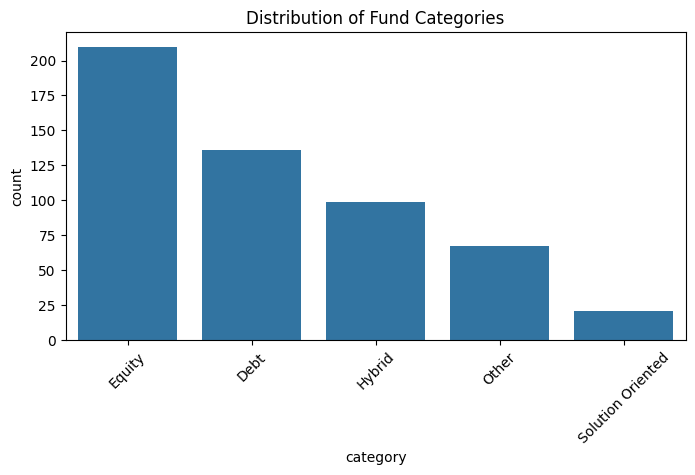

In [141]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title("Distribution of Fund Categories")
plt.xticks(rotation=45)
plt.show()

In [142]:
top_amc = df["amc_name"].value_counts().head(10)

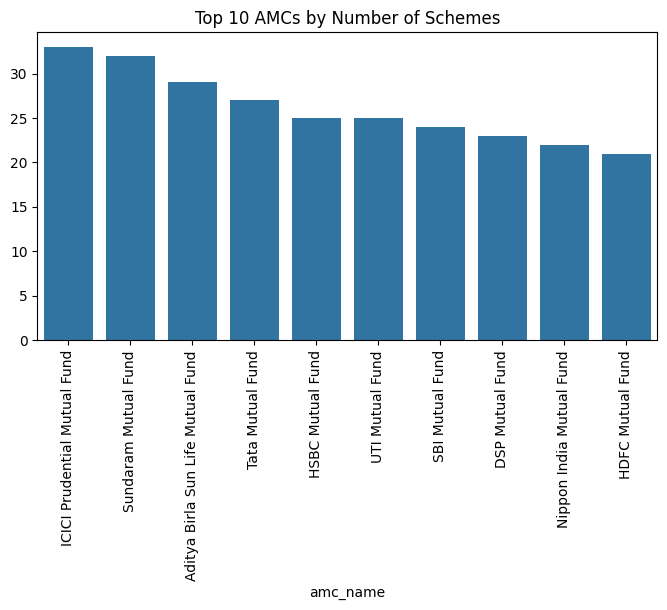

In [143]:
plt.figure(figsize=(8,4))
sns.barplot(x=top_amc.index,y=top_amc.values)
plt.title("Top 10 AMCs by Number of Schemes")
plt.xticks(rotation=90)
plt.show()

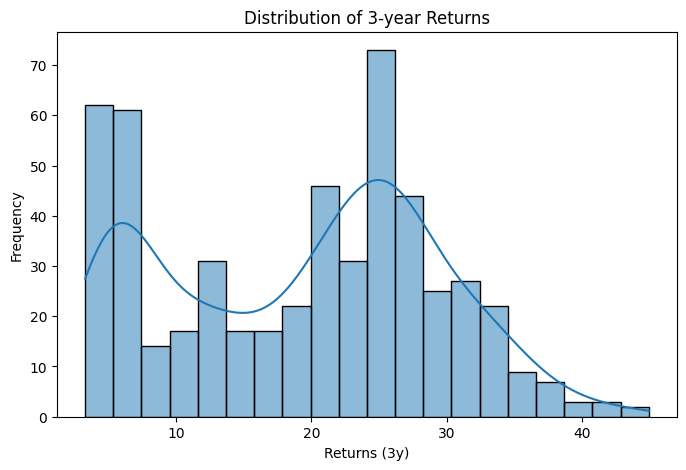

In [144]:
plt.figure(figsize=(8,5))
sns.histplot(df["returns_3yr"],kde=True,bins=20)
plt.title("Distribution of 3-year Returns")
plt.xlabel("Returns (3y)")
plt.ylabel("Frequency")
plt.show()


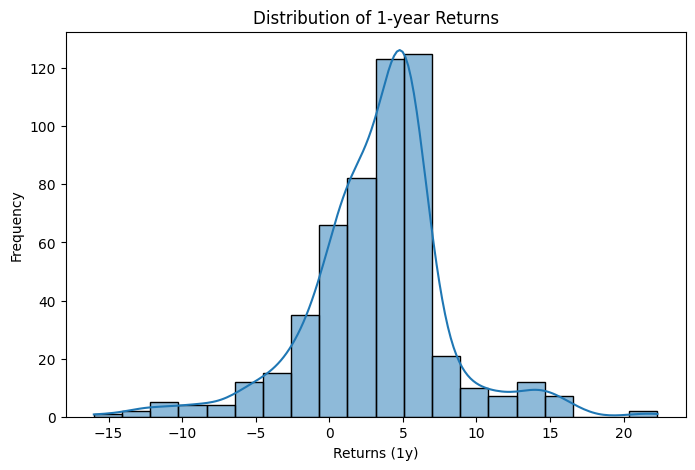

In [145]:
plt.figure(figsize=(8,5))
sns.histplot(df["returns_1yr"],kde=True,bins=20)
plt.title("Distribution of 1-year Returns")
plt.xlabel("Returns (1y)")
plt.ylabel("Frequency")
plt.show()


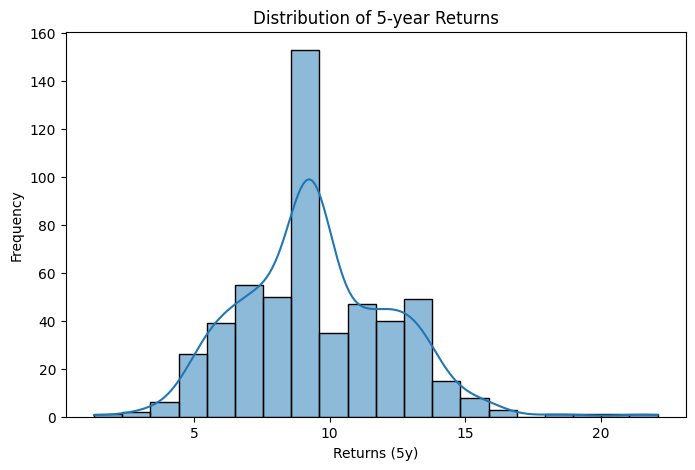

In [146]:
plt.figure(figsize=(8,5))
sns.histplot(df["returns_5yr"],kde=True,bins=20)
plt.title("Distribution of 5-year Returns")
plt.xlabel("Returns (5y)")
plt.ylabel("Frequency")
plt.show()


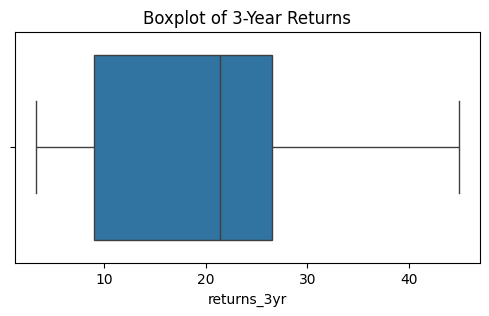

In [147]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['returns_3yr'])
plt.title("Boxplot of 3-Year Returns")
plt.show()


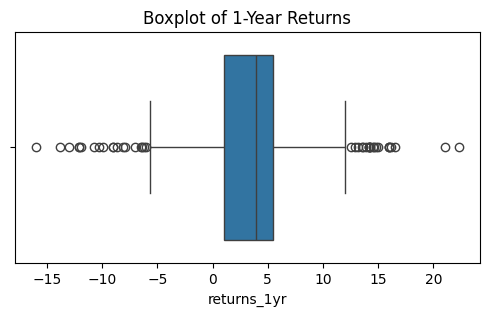

In [148]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['returns_1yr'])
plt.title("Boxplot of 1-Year Returns")
plt.show()

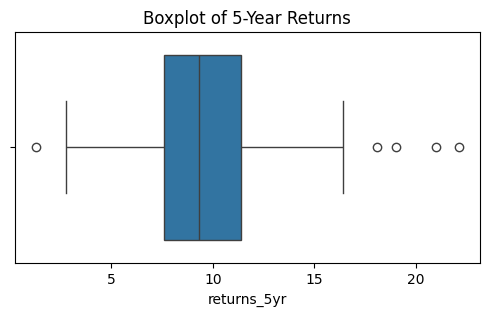

In [149]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['returns_5yr'])
plt.title("Boxplot of 5-Year Returns")
plt.show()

In [150]:
df["expense_ratio"].describe()

count    533.000000
mean       0.770113
std        0.483055
min        0.060000
25%        0.360000
50%        0.680000
75%        1.100000
max        2.200000
Name: expense_ratio, dtype: float64

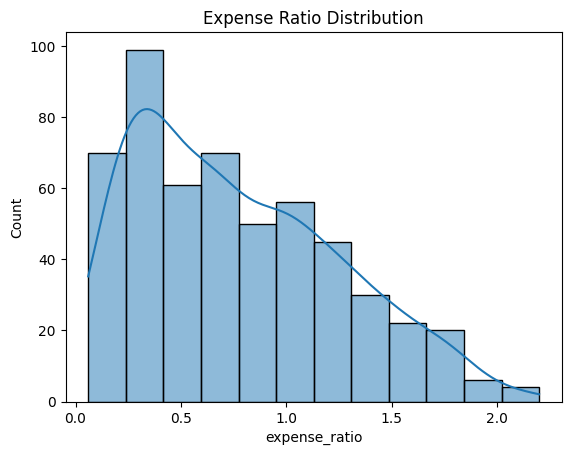

In [151]:
df["expense_ratio"].describe()
sns.histplot(df["expense_ratio"],kde=True)
plt.title("Expense Ratio Distribution")
plt.show()

In [152]:
corr = df[['returns_1yr', 'returns_3yr', 'returns_5yr', 'expense_ratio', 'fund_size_cr']].corr(method='pearson')
corr


,returns_1yr,returns_3yr,returns_5yr,expense_ratio,fund_size_cr
returns_1yr,1.000000,-0.204288,-0.135807,-0.151555,-0.023206
returns_3yr,-0.204288,1.000000,0.673613,0.416626,0.045239
returns_5yr,-0.135807,0.673613,1.000000,0.140474,0.083870
expense_ratio,-0.151555,0.416626,0.140474,1.000000,-0.106584
fund_size_cr,-0.023206,0.045239,0.083870,-0.106584,1.000000


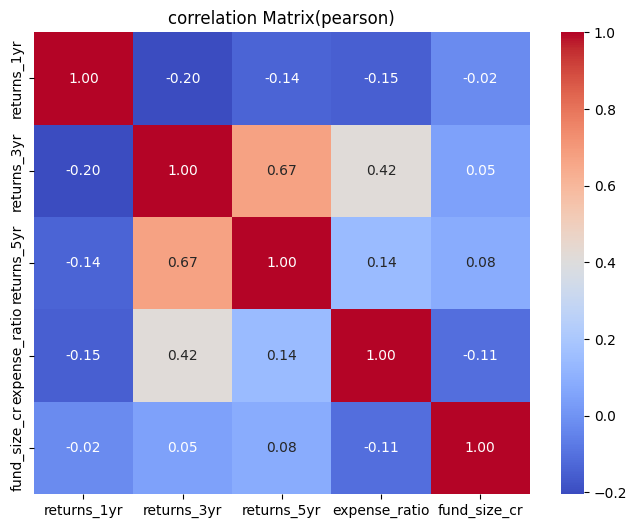

In [153]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correlation Matrix(pearson)")
plt.show()

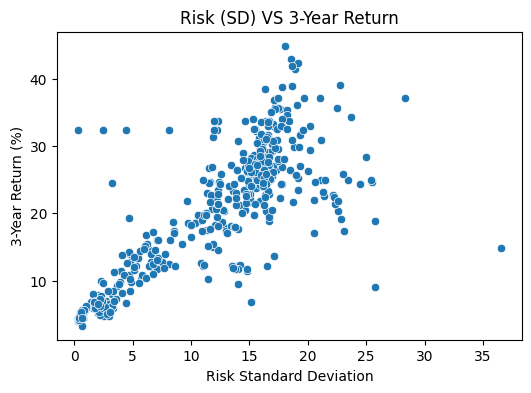

In [154]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x="sd",y="returns_3yr")
plt.title("Risk (SD) VS 3-Year Return")
plt.xlabel("Risk Standard Deviation")
plt.ylabel("3-Year Return (%)")
plt.show()

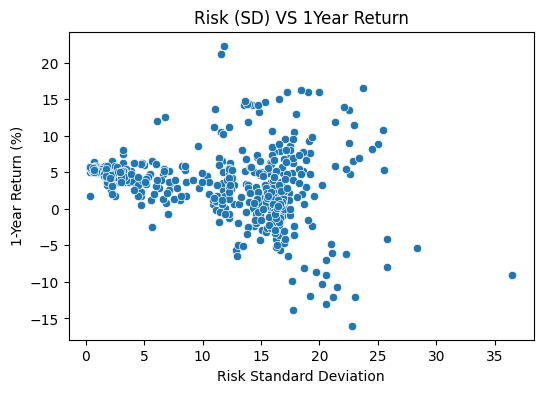

In [155]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x="sd",y="returns_1yr")
plt.title("Risk (SD) VS 1Year Return")
plt.xlabel("Risk Standard Deviation")
plt.ylabel("1-Year Return (%)")
plt.show()

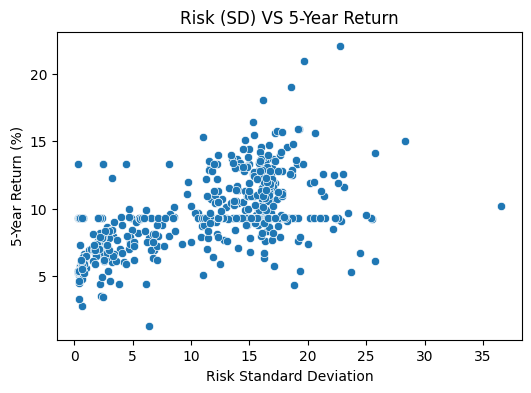

In [156]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x="sd",y="returns_5yr")
plt.title("Risk (SD) VS 5-Year Return")
plt.xlabel("Risk Standard Deviation")
plt.ylabel("5-Year Return (%)")
plt.show()

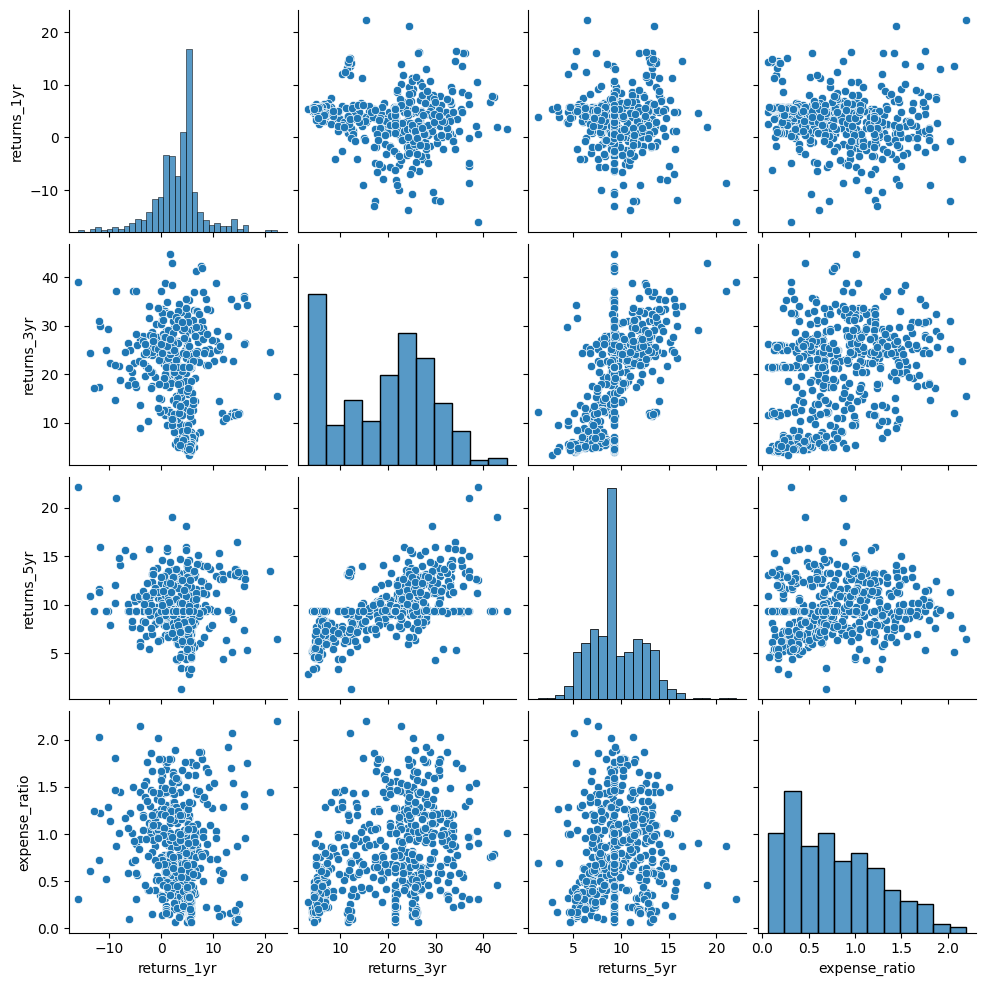

In [157]:
sns.pairplot(df[['returns_1yr', 'returns_3yr', 'returns_5yr', 'expense_ratio']])
plt.show()


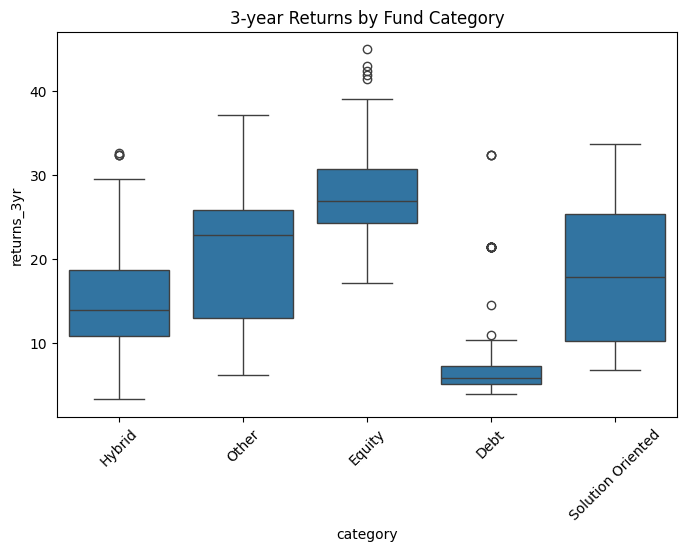

In [158]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x="category",y="returns_3yr")
plt.title("3-year Returns by Fund Category")
plt.xticks(rotation=45)
plt.show()

In [159]:
avg_expense = df.groupby("sub_category")["expense_ratio"].mean().sort_values(ascending=False)

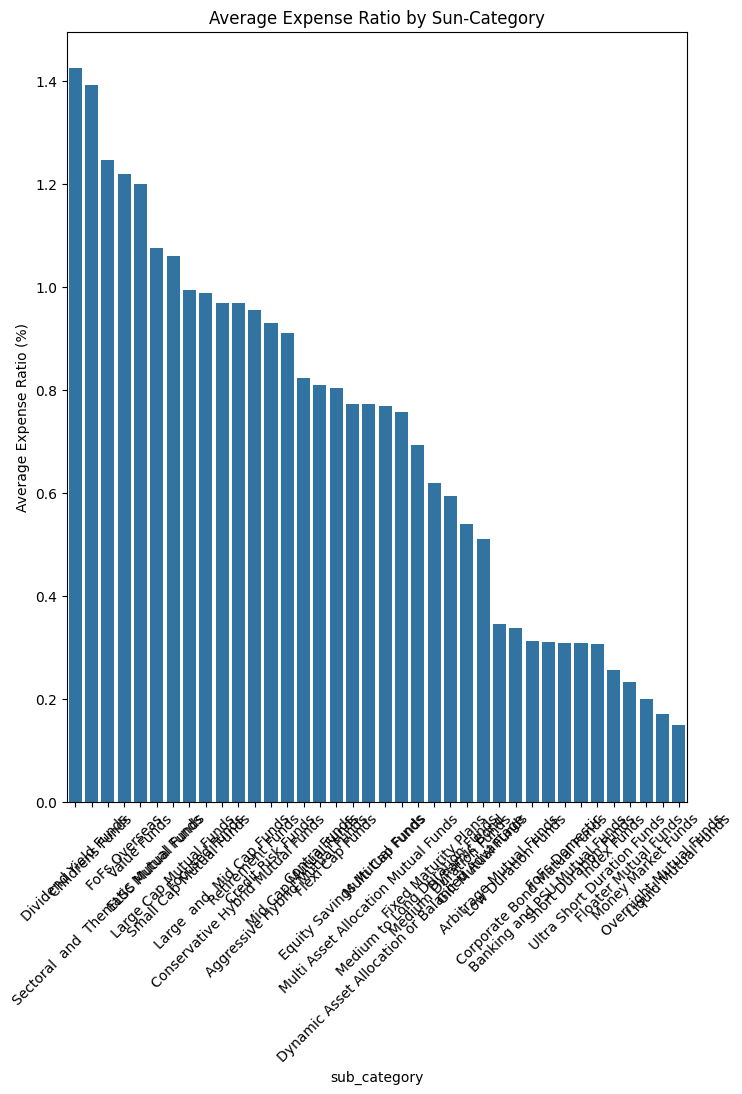

In [160]:
plt.figure(figsize=(8,10))
sns.barplot(x=avg_expense.index,y=avg_expense.values)
plt.title("Average Expense Ratio by Sun-Category")
plt.xticks(rotation=45)
plt.ylabel("Average Expense Ratio (%)")
plt.show()

<Axes: xlabel='category', ylabel='returns_3yr'>

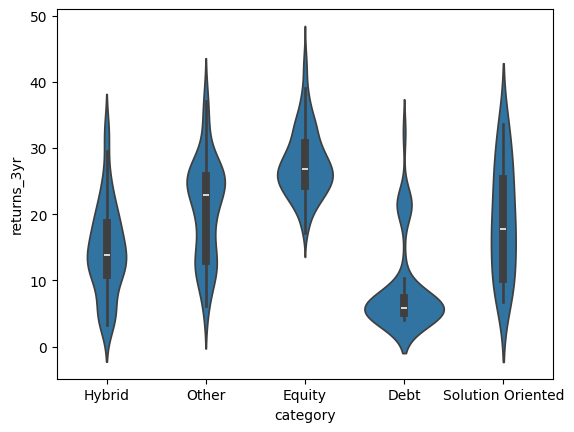

In [161]:
sns.violinplot(data=df,x="category",y="returns_3yr")

<Axes: xlabel='category', ylabel='returns_1yr'>

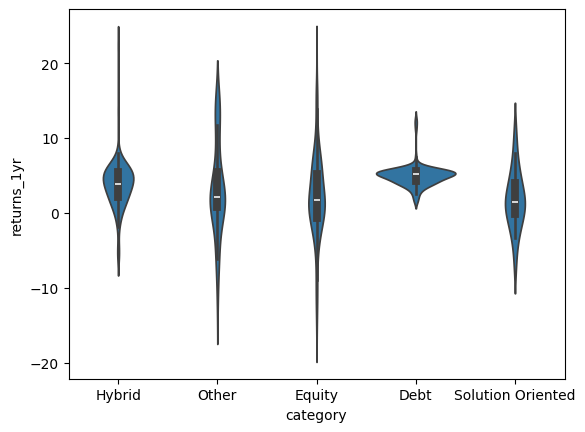

In [162]:
sns.violinplot(data=df,x="category",y="returns_1yr")

<Axes: xlabel='category', ylabel='returns_5yr'>

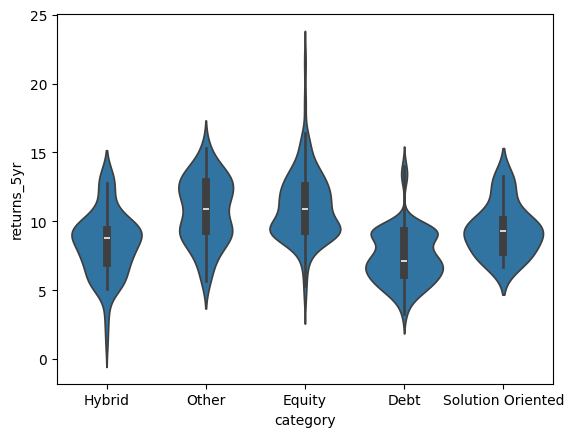

In [163]:
sns.violinplot(data=df,x="category",y="returns_5yr")

In [164]:
cross_tab = pd.crosstab(df["amc_name"],df["category"])
cross_tab.head()

category,Debt,Equity,Hybrid,Other,Solution Oriented
amc_name,,,,,
Aditya Birla Sun Life Mutual Fund,3,13,5,7,1
Axis Mutual Fund,8,1,6,3,2
Bandhan Mutual Fund,0,0,0,1,0
Bank of India Mutual Fund,3,4,2,0,0
Baroda BNP Paribas Mutual Fund,8,7,5,0,0


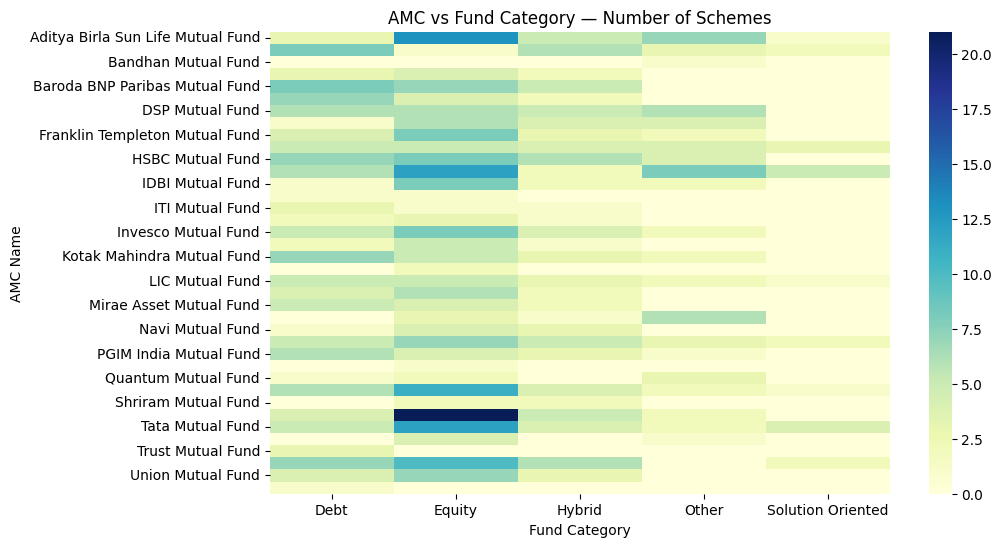

In [165]:
plt.figure(figsize=(10,6))
sns.heatmap(cross_tab, cmap='YlGnBu')
plt.title("AMC vs Fund Category — Number of Schemes")
plt.xlabel("Fund Category")
plt.ylabel("AMC Name")
plt.show()


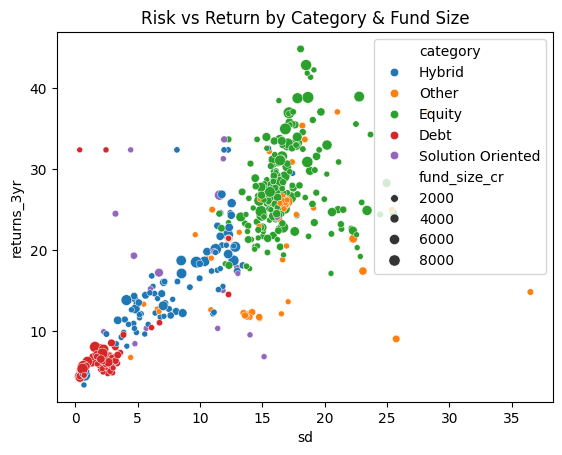

In [166]:
sns.scatterplot(data=df, x='sd', y='returns_3yr', hue='category', size='fund_size_cr')
plt.title("Risk vs Return by Category & Fund Size")
plt.show()


In [167]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
1,Aditya Birla SL Arbitrage Fund,1000.0,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.530,0.72,0.56,1.10,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF Dir Growth,1000.0,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.670,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
4,Aditya Birla SL Balanced Advantage Fund,100.0,100,0.61,6386.0,10,Mohit Sharma,3.69,1.990,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7
5,Aditya Birla SL Banking and Financial Services...,1000.0,1000,1.17,2384.0,9,Dhaval Gala,2.07,1.240,25.53,0.96,0.97,6,Aditya Birla Sun Life Mutual Fund,2,Equity,Sectoral and Thematic Mutual Funds,5.3,24.6,9.2
7,Aditya Birla SL CEF Global Agri Plan Direct ...,1000.0,1000,1.29,15.0,10,Vinod Narayan Bhat,1.42,1.855,20.18,0.86,1.06,6,Aditya Birla Sun Life Mutual Fund,3,Equity,Sectoral and Thematic Mutual Funds,-10.3,29.4,9.3


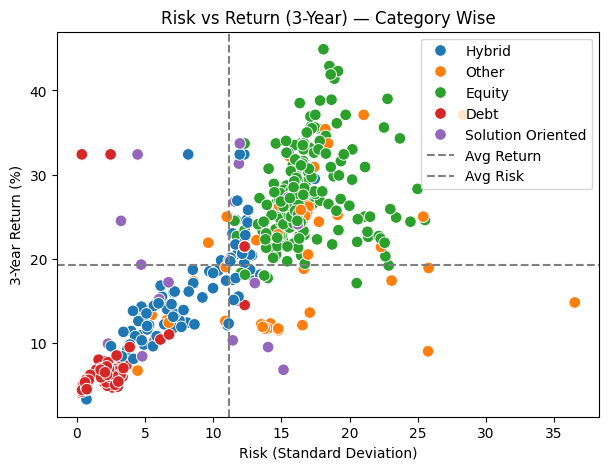

In [168]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='sd', y='returns_3yr', hue='category', s=70)
plt.title("Risk vs Return (3-Year) — Category Wise")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("3-Year Return (%)")
plt.axhline(y=df['returns_3yr'].mean(), color='gray', linestyle='--', label='Avg Return')
plt.axvline(x=df['sd'].mean(), color='gray', linestyle='--', label='Avg Risk')
plt.legend()
plt.show()


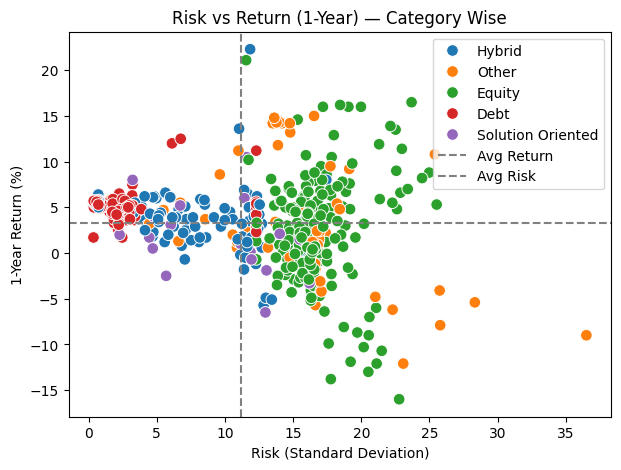

In [169]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='sd', y='returns_1yr', hue='category', s=70)
plt.title("Risk vs Return (1-Year) — Category Wise")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("1-Year Return (%)")
plt.axhline(y=df['returns_1yr'].mean(), color='gray', linestyle='--', label='Avg Return')
plt.axvline(x=df['sd'].mean(), color='gray', linestyle='--', label='Avg Risk')
plt.legend()
plt.show()


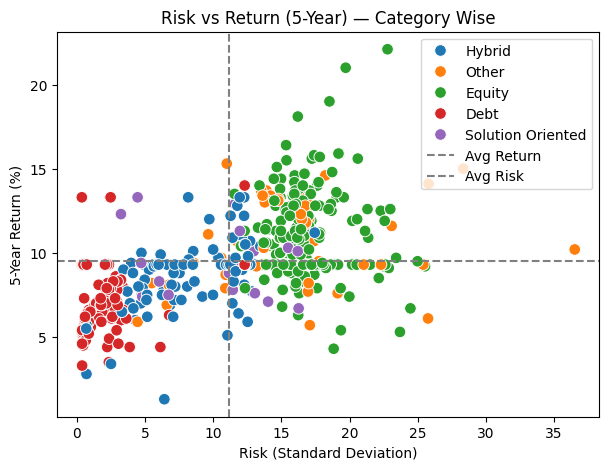

In [170]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='sd', y='returns_5yr', hue='category', s=70)
plt.title("Risk vs Return (5-Year) — Category Wise")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("5-Year Return (%)")
plt.axhline(y=df['returns_5yr'].mean(), color='gray', linestyle='--', label='Avg Return')
plt.axvline(x=df['sd'].mean(), color='gray', linestyle='--', label='Avg Risk')
plt.legend()
plt.show()


In [171]:
# created the new features from dataset

In [172]:
df['avg_return'] = (df['returns_1yr'] + df['returns_3yr'] + df['returns_5yr']) / 3

In [173]:
df['risk_adjusted_score'] = (df['sharpe'] + df['sortino']) / 2

In [174]:
df['performance_score'] = (0.4*df['avg_return'] + 0.3*df['alpha'] + 0.2*df['rating'] + 0.1*df['risk_adjusted_score'])

In [175]:
df['popularity_score'] = np.log(df['fund_size_cr']) + (df['fund_age_yr']/5)

In [176]:
df['volatility_index'] = (df['sd'] + df['beta']) / 2

In [177]:
df['age_efficiency'] = df['avg_return'] / df['fund_age_yr']

In [178]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,...,sub_category,returns_1yr,returns_3yr,returns_5yr,avg_return,risk_adjusted_score,performance_score,popularity_score,volatility_index,age_efficiency
1,Aditya Birla SL Arbitrage Fund,1000.0,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.530,0.72,...,Arbitrage Mutual Funds,5.6,4.8,5.5,5.300000,1.215,3.3005,10.363576,0.640,0.53
2,Aditya Birla SL Asset Allocator FoF Dir Growth,1000.0,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.670,10.58,...,FoFs Domestic,2.0,18.9,9.7,10.200000,2.430,5.724,7.056246,5.625,1.02
4,Aditya Birla SL Balanced Advantage Fund,100.0,100,0.61,6386.0,10,Mohit Sharma,3.69,1.990,10.38,...,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7,10.933333,2.540,6.024333,10.761863,5.530,1.093333
5,Aditya Birla SL Banking and Financial Services...,1000.0,1000,1.17,2384.0,9,Dhaval Gala,2.07,1.240,25.53,...,Sectoral and Thematic Mutual Funds,5.3,24.6,9.2,13.033333,1.520,6.137333,9.576535,13.245,1.448148
7,Aditya Birla SL CEF Global Agri Plan Direct ...,1000.0,1000,1.29,15.0,10,Vinod Narayan Bhat,1.42,1.855,20.18,...,Sectoral and Thematic Mutual Funds,-10.3,29.4,9.3,9.466667,1.240,5.067167,4.70805,10.520,0.946667


In [179]:
trend = df.groupby("category")[["returns_1yr","returns_3yr","returns_5yr"]].mean().reset_index()
trend

,category,returns_1yr,returns_3yr,returns_5yr
0,Debt,4.969118,8.653309,7.412500
1,Equity,2.236190,27.686429,11.062857
2,Hybrid,3.788889,14.698990,8.414141
3,Other,3.202985,20.942537,10.753731
4,Solution Oriented,1.742857,19.142857,9.400000


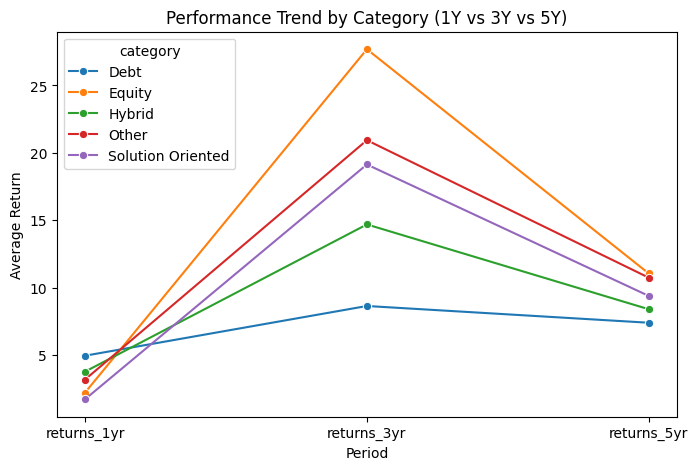

In [180]:
trend_melt = trend.melt(id_vars='category', var_name='Period', value_name='Average Return')

plt.figure(figsize=(8,5))
sns.lineplot(data=trend_melt, x='Period', y='Average Return', hue='category', marker='o')
plt.title("Performance Trend by Category (1Y vs 3Y vs 5Y)")
plt.show()


In [181]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,...,sub_category,returns_1yr,returns_3yr,returns_5yr,avg_return,risk_adjusted_score,performance_score,popularity_score,volatility_index,age_efficiency
1,Aditya Birla SL Arbitrage Fund,1000.0,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.530,0.72,...,Arbitrage Mutual Funds,5.6,4.8,5.5,5.300000,1.215,3.3005,10.363576,0.640,0.53
2,Aditya Birla SL Asset Allocator FoF Dir Growth,1000.0,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.670,10.58,...,FoFs Domestic,2.0,18.9,9.7,10.200000,2.430,5.724,7.056246,5.625,1.02
4,Aditya Birla SL Balanced Advantage Fund,100.0,100,0.61,6386.0,10,Mohit Sharma,3.69,1.990,10.38,...,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7,10.933333,2.540,6.024333,10.761863,5.530,1.093333
5,Aditya Birla SL Banking and Financial Services...,1000.0,1000,1.17,2384.0,9,Dhaval Gala,2.07,1.240,25.53,...,Sectoral and Thematic Mutual Funds,5.3,24.6,9.2,13.033333,1.520,6.137333,9.576535,13.245,1.448148
7,Aditya Birla SL CEF Global Agri Plan Direct ...,1000.0,1000,1.29,15.0,10,Vinod Narayan Bhat,1.42,1.855,20.18,...,Sectoral and Thematic Mutual Funds,-10.3,29.4,9.3,9.466667,1.240,5.067167,4.70805,10.520,0.946667


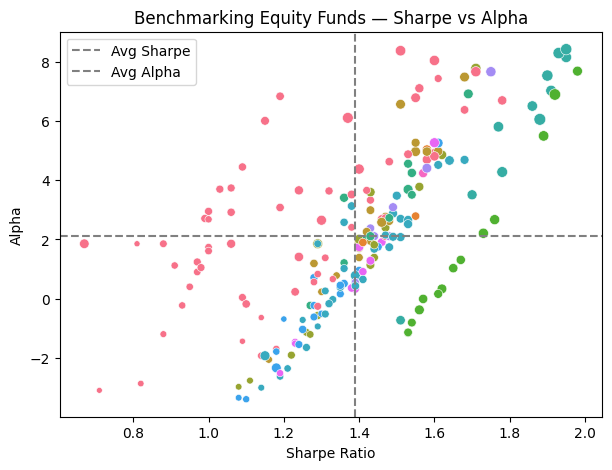

In [182]:
eq_funds = df[df['category'] == 'Equity']

plt.figure(figsize=(7,5))
sns.scatterplot(data=eq_funds, x='sharpe', y='alpha', size='returns_3yr', hue='sub_category', legend=False)
plt.axvline(eq_funds['sharpe'].mean(), color='gray', linestyle='--', label='Avg Sharpe')
plt.axhline(eq_funds['alpha'].mean(), color='gray', linestyle='--', label='Avg Alpha')
plt.title("Benchmarking Equity Funds — Sharpe vs Alpha")
plt.xlabel("Sharpe Ratio")
plt.ylabel("Alpha")
plt.legend()
plt.show()


In [183]:

debt_funds = df[df['category'].str.contains('Debt', case=False)]


best_debt_funds = debt_funds.sort_values(by=['sharpe', 'expense_ratio'], ascending=[False, True])


best_debt_funds[['scheme_name', 'sharpe', 'expense_ratio']].head(10)


,scheme_name,sharpe,expense_ratio
83,AXIS Ultra Short Term Fund,2.25,0.31
306,ICICI Pru Credit Risk Fund,2.15,0.86
732,Tata Money Market Fund,2.05,0.17
743,Tata Ultra Short Term Fund,2.03,0.25
798,UTI Money Market Fund,1.98,0.20
595,PGIM India Money Market Fund,1.92,0.15
71,AXIS Money Market Fund,1.91,0.21
598,PGIM India Ultra Short Duration Fund,1.90,0.25
710,Sundaram Ultra Short Duration Fund,1.85,0.17
560,Nippon India Low Duration Fund,1.82,0.37


In [184]:

small_cap = df[df['sub_category'].str.contains('Small Cap', case=False)]


consistent_performers = small_cap[(small_cap['returns_3yr'] > 15) & (small_cap['returns_5yr'] > 15)]


consistent_performers[['scheme_name', 'returns_3yr', 'returns_5yr']]


,scheme_name,returns_3yr,returns_5yr


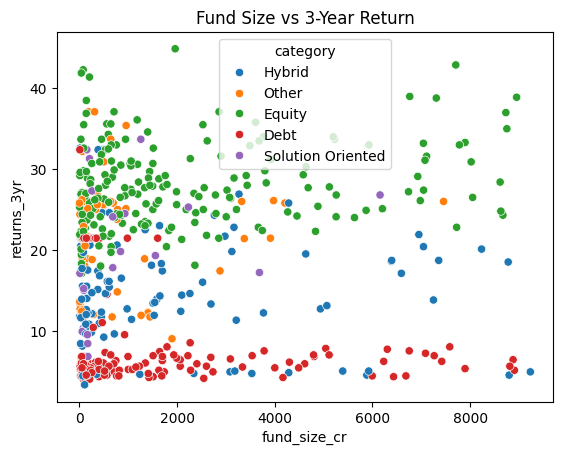

Correlation between fund size and 3-year return: 0.045238919784902465


In [185]:

# Scatter plot
sns.scatterplot(x='fund_size_cr', y='returns_3yr', hue='category', data=df)
plt.title('Fund Size vs 3-Year Return')
plt.show()

# Correlation check
correlation = df['fund_size_cr'].corr(df['returns_3yr'])
print("Correlation between fund size and 3-year return:", correlation)


In [186]:
for column in df.columns:
    print(column)

scheme_name
min_sip
min_lumpsum
expense_ratio
fund_size_cr
fund_age_yr
fund_manager
sortino
alpha
sd
beta
sharpe
risk_level
amc_name
rating
category
sub_category
returns_1yr
returns_3yr
returns_5yr
avg_return
risk_adjusted_score
performance_score
popularity_score
volatility_index
age_efficiency


In [187]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,...,sub_category,returns_1yr,returns_3yr,returns_5yr,avg_return,risk_adjusted_score,performance_score,popularity_score,volatility_index,age_efficiency
1,Aditya Birla SL Arbitrage Fund,1000.0,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.530,0.72,...,Arbitrage Mutual Funds,5.6,4.8,5.5,5.300000,1.215,3.3005,10.363576,0.640,0.53
2,Aditya Birla SL Asset Allocator FoF Dir Growth,1000.0,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.670,10.58,...,FoFs Domestic,2.0,18.9,9.7,10.200000,2.430,5.724,7.056246,5.625,1.02
4,Aditya Birla SL Balanced Advantage Fund,100.0,100,0.61,6386.0,10,Mohit Sharma,3.69,1.990,10.38,...,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7,10.933333,2.540,6.024333,10.761863,5.530,1.093333
5,Aditya Birla SL Banking and Financial Services...,1000.0,1000,1.17,2384.0,9,Dhaval Gala,2.07,1.240,25.53,...,Sectoral and Thematic Mutual Funds,5.3,24.6,9.2,13.033333,1.520,6.137333,9.576535,13.245,1.448148
7,Aditya Birla SL CEF Global Agri Plan Direct ...,1000.0,1000,1.29,15.0,10,Vinod Narayan Bhat,1.42,1.855,20.18,...,Sectoral and Thematic Mutual Funds,-10.3,29.4,9.3,9.466667,1.240,5.067167,4.70805,10.520,0.946667


In [188]:
df.shape


(533, 26)

In [189]:
df.dtypes


scheme_name             object
min_sip                float64
min_lumpsum              int64
expense_ratio          float64
fund_size_cr           float64
fund_age_yr              Int64
fund_manager            object
sortino                float64
alpha                  float64
sd                     float64
beta                   float64
sharpe                 float64
risk_level               Int64
amc_name                object
rating                   Int64
category                object
sub_category            object
returns_1yr            float64
returns_3yr            float64
returns_5yr            float64
avg_return             float64
risk_adjusted_score    float64
performance_score      Float64
popularity_score       Float64
volatility_index       float64
age_efficiency         Float64
dtype: object

In [190]:
df.isnull().sum()


scheme_name            0
min_sip                0
min_lumpsum            0
expense_ratio          0
fund_size_cr           0
fund_age_yr            0
fund_manager           0
sortino                0
alpha                  0
sd                     0
beta                   0
sharpe                 0
risk_level             0
amc_name               0
rating                 0
category               0
sub_category           0
returns_1yr            0
returns_3yr            0
returns_5yr            0
avg_return             0
risk_adjusted_score    0
performance_score      0
popularity_score       0
volatility_index       0
age_efficiency         0
dtype: int64

In [191]:
missing_cols = df.columns[df.isnull().any()]
missing_cols


Index([], dtype='object')

In [192]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

mean_values = df[numeric_cols].mean()
median_values = df[numeric_cols].median()
mode_values = df[numeric_cols].mode().iloc[0]

print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)


Mean:
 min_sip                 550.446152
min_lumpsum            3106.829268
expense_ratio             0.770113
fund_size_cr           1776.058705
fund_age_yr               8.227017
sortino                   2.757054
alpha                      1.86182
sd                       11.165422
beta                      0.838687
sharpe                    1.260356
risk_level                4.664165
rating                    3.035647
returns_1yr               3.324015
returns_3yr              19.233302
returns_5yr               9.535084
avg_return               10.697467
risk_adjusted_score       2.008705
performance_score         5.645533
popularity_score          8.043059
volatility_index          6.002054
age_efficiency            1.628558
dtype: Float64

Median:
 min_sip                    500.0
min_lumpsum               5000.0
expense_ratio               0.68
fund_size_cr               685.0
fund_age_yr                 10.0
sortino                     2.88
alpha                      1.855
sd

In [193]:

df['amc_name'].nunique()


38

In [194]:
df['category'].nunique(), df['sub_category'].nunique()


(5, 38)

In [195]:
df['risk_level'].value_counts()


risk_level
6    302
2     75
3     67
4     46
5     24
1     19
Name: count, dtype: Int64

In [196]:


oldest_fund = df.loc[df["fund_age_yr"].idxmax()][["scheme_name","fund_age_yr"]]
oldest_fund

scheme_name    Quantum Long Term Equity Value Fund
fund_age_yr                                     17
Name: 614, dtype: object

In [197]:


largest_fund = df.loc[df["fund_size_cr"].idxmax()][["scheme_name","fund_size_cr"]]
largest_fund

scheme_name     Nippon India Arbitrage Fund
fund_size_cr                         9234.0
Name: 539, dtype: object

In [198]:


top_manager = df["fund_manager"].value_counts().sort_values(ascending=False).head(1)
top_manager

fund_manager
Rohit Seksaria    13
Name: count, dtype: int64

In [199]:


avg_expense_by_category = df.groupby("category")["expense_ratio"].mean().sort_values(ascending=False)
avg_expense_by_category

category
Solution Oriented    1.101905
Equity               1.075238
Hybrid               0.770101
Other                0.492836
Debt                 0.384338
Name: expense_ratio, dtype: float64

In [200]:

avg_return3_by_category = df.groupby("category")["returns_3yr"].mean().sort_values(ascending=False)
avg_return3_by_category 

category
Equity               27.686429
Other                20.942537
Solution Oriented    19.142857
Hybrid               14.698990
Debt                  8.653309
Name: returns_3yr, dtype: float64

In [201]:

avg_expense_by_category = df.groupby('category')['expense_ratio'].mean().sort_values(ascending=False)
avg_expense_by_category

category
Solution Oriented    1.101905
Equity               1.075238
Hybrid               0.770101
Other                0.492836
Debt                 0.384338
Name: expense_ratio, dtype: float64

In [202]:

avg_returns3_by_category = df.groupby('category')['returns_3yr'].mean().sort_values(ascending=False)
avg_returns3_by_category

category
Equity               27.686429
Other                20.942537
Solution Oriented    19.142857
Hybrid               14.698990
Debt                  8.653309
Name: returns_3yr, dtype: float64

In [203]:

avg_sharpe_by_risk = df.groupby('risk_level')['sharpe'].mean().sort_values(ascending=False)
avg_sharpe_by_risk

risk_level
4    1.445652
6    1.340331
2    1.165067
5    1.116250
3    1.011194
1    0.977368
Name: sharpe, dtype: float64

In [204]:


top5_returns_5yr = df[["scheme_name","returns_5yr"]].sort_values(by="returns_5yr",ascending=False).head(5)
top5_returns_5yr

,scheme_name,returns_5yr
715,Tata Digital India Fund,22.1
664,SBI Technology Opportunities Fund,21.0
594,PGIM India Midcap Opportunities Fund,19.0
371,IIFL Focused Equity Fund,18.1
522,Motilal Oswal Midcap Fund,16.4


In [205]:

lowest_volatility = df[['scheme_name', 'volatility_index']].sort_values(by='volatility_index', ascending=True).head(10)
lowest_volatility

,scheme_name,volatility_index
96,Bank of India Overnight Fund,0.405
538,Navi Ultra Short Term Fund,0.475
377,Indiabulls Liquid Fund,0.495
424,JM Liquid Fund,0.520
138,Canara Robeco Liquid Fund,0.525
670,Sundaram Arbitrage Fund,0.545
116,Baroda BNP Paribas Liquid Fund,0.550
475,LIC MF Liquid Fund,0.550
490,Mahindra Manulife Liquid Fund,0.555
362,IDBI Liquid Fund,0.555


In [206]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,...,sub_category,returns_1yr,returns_3yr,returns_5yr,avg_return,risk_adjusted_score,performance_score,popularity_score,volatility_index,age_efficiency
1,Aditya Birla SL Arbitrage Fund,1000.0,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.530,0.72,...,Arbitrage Mutual Funds,5.6,4.8,5.5,5.300000,1.215,3.3005,10.363576,0.640,0.53
2,Aditya Birla SL Asset Allocator FoF Dir Growth,1000.0,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.670,10.58,...,FoFs Domestic,2.0,18.9,9.7,10.200000,2.430,5.724,7.056246,5.625,1.02
4,Aditya Birla SL Balanced Advantage Fund,100.0,100,0.61,6386.0,10,Mohit Sharma,3.69,1.990,10.38,...,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7,10.933333,2.540,6.024333,10.761863,5.530,1.093333
5,Aditya Birla SL Banking and Financial Services...,1000.0,1000,1.17,2384.0,9,Dhaval Gala,2.07,1.240,25.53,...,Sectoral and Thematic Mutual Funds,5.3,24.6,9.2,13.033333,1.520,6.137333,9.576535,13.245,1.448148
7,Aditya Birla SL CEF Global Agri Plan Direct ...,1000.0,1000,1.29,15.0,10,Vinod Narayan Bhat,1.42,1.855,20.18,...,Sectoral and Thematic Mutual Funds,-10.3,29.4,9.3,9.466667,1.240,5.067167,4.70805,10.520,0.946667


In [207]:
row = df.loc[df["beta"].idxmax()]
print(row["scheme_name"])
print(row["returns_1yr"].mean())


DSP Low Duration Fund
5.1


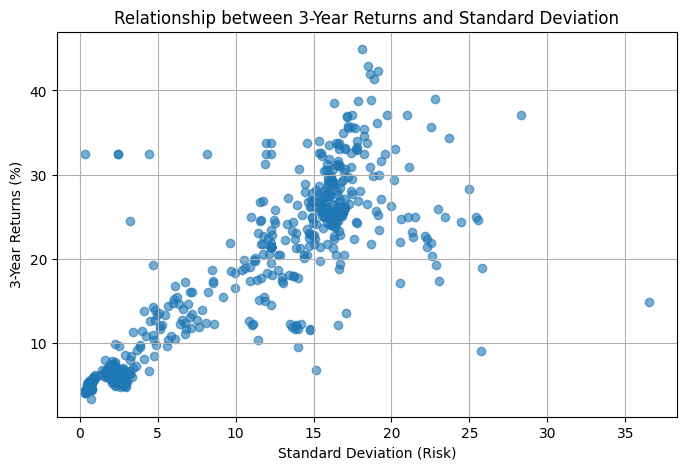

Correlation between returns_3yr and sd: 0.8299099757355533


In [208]:

# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df['sd'], df['returns_3yr'], alpha=0.6)
plt.title('Relationship between 3-Year Returns and Standard Deviation')
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('3-Year Returns (%)')
plt.grid(True)
plt.show()

# Correlation value
correlation_sd_return3 = df['returns_3yr'].corr(df['sd'])
print("Correlation between returns_3yr and sd:", correlation_sd_return3)

In [209]:

high_beta_funds = df[df['beta'] > 1]
avg_return_high_beta = high_beta_funds['returns_1yr'].mean()

print("Average 1-Year Return for High Beta Funds:", avg_return_high_beta)

Average 1-Year Return for High Beta Funds: 4.691071428571429


In [210]:
low_beta_funds = df[df['beta'] <= 1]
avg_return_low_beta = low_beta_funds['returns_1yr'].mean()
print("Average 1-Year Return for Low Beta Funds:", avg_return_low_beta)


Average 1-Year Return for Low Beta Funds: 3.1635220125786163


In [211]:

corr_sharpe_sortino = df['sharpe'].corr(df['sortino'])
print("Correlation between Sharpe and Sortino Ratio:", corr_sharpe_sortino)

Correlation between Sharpe and Sortino Ratio: 0.8151007811616849


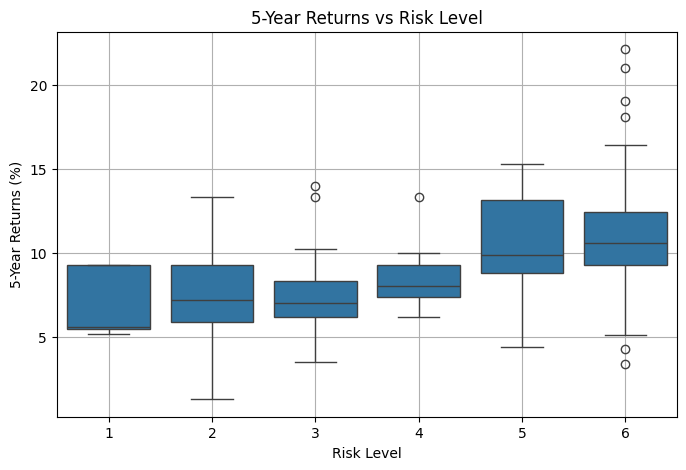

In [212]:

plt.figure(figsize=(8,5))
sns.boxplot(x='risk_level', y='returns_5yr', data=df)
plt.title('5-Year Returns vs Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('5-Year Returns (%)')
plt.grid(True)
plt.show()

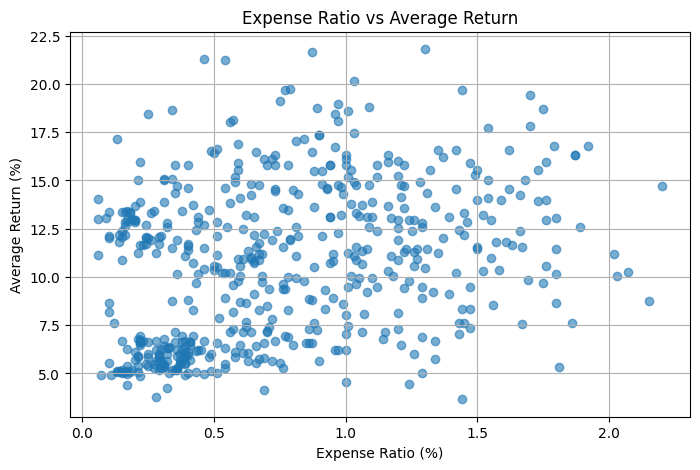

Correlation between Expense Ratio and Average Return: 0.32106240316925866


In [213]:

# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df['expense_ratio'], df['avg_return'], alpha=0.6)
plt.title('Expense Ratio vs Average Return')
plt.xlabel('Expense Ratio (%)')
plt.ylabel('Average Return (%)')
plt.grid(True)
plt.show()

# Correlation
corr_expense_return = df['expense_ratio'].corr(df['avg_return'])
print("Correlation between Expense Ratio and Average Return:", corr_expense_return)

In [214]:

avg_perf_by_manager = df.groupby('fund_manager')['performance_score'].mean().sort_values(ascending=False)
avg_perf_by_manager.head(10)

fund_manager
Niket Shah             12.258667
Roshi Jain             11.709333
Priyanka Khandelwal       10.979
Ihab Dalwai              10.8505
Aniruddha Naha            10.527
Sanjeev Sharma         10.415833
Sohini Andani          10.327667
Ajay Argal                10.302
Anish Tawakley         10.291833
Chirag Setalvad         9.878333
Name: performance_score, dtype: Float64

In [215]:

avg_3yr_by_amc = df.groupby('amc_name')['returns_3yr'].mean().sort_values(ascending=False)
top_amc = avg_3yr_by_amc.head(1)
print(top_amc)

amc_name
L&T Mutual Fund    33.35
Name: returns_3yr, dtype: float64


In [216]:

consistency_by_manager = df.groupby('fund_manager')['returns_5yr'].std().sort_values()
consistency_by_manager.head(10)

fund_manager
Anand Nevatia      0.000000
Basant Bafna       0.000000
Jinesh Gopani      0.000000
Dhimant Shah       0.000000
Vikrant Mehta      0.000000
Swapnil Mayekar    0.000000
Yogesh Patil       0.173205
Deepak Ramaraju    0.200000
Dinesh Ahuja       0.221736
Vihang Naik        0.282843
Name: returns_5yr, dtype: float64

In [217]:
manager_consistency = df.groupby('fund_manager')['returns_5yr'].agg(['mean', 'std']).sort_values(by='std')
manager_consistency.head(10)

,mean,std
fund_manager,,
Anand Nevatia,9.300,0.000000
Basant Bafna,9.300,0.000000
Jinesh Gopani,9.300,0.000000
Dhimant Shah,9.300,0.000000
Vikrant Mehta,9.300,0.000000
Swapnil Mayekar,9.300,0.000000
Yogesh Patil,11.000,0.173205
Deepak Ramaraju,9.200,0.200000
Dinesh Ahuja,7.975,0.221736


In [218]:

avg_risk_adj_by_amc = df.groupby('amc_name')['risk_adjusted_score'].mean().sort_values(ascending=False)
avg_risk_adj_by_amc.head(10)

amc_name
Sundaram Mutual Fund              2.410781
Mahindra Manulife Mutual Fund     2.397083
Quant Mutual Fund                 2.315000
Mirae Asset Mutual Fund           2.280455
Union Mutual Fund                 2.230357
JM Financial Mutual Fund          2.188125
ICICI Prudential Mutual Fund      2.171818
PGIM India Mutual Fund            2.157500
Franklin Templeton Mutual Fund    2.155294
Navi Mutual Fund                  2.153750
Name: risk_adjusted_score, dtype: float64

In [219]:

df['return_per_year'] = df['avg_return'] / df['fund_age_yr']
age_efficiency_by_amc = df.groupby('amc_name')['return_per_year'].mean().sort_values(ascending=False)
age_efficiency_by_amc.head(10)

amc_name
Trust Mutual Fund                5.836111
ITI Mutual Fund                     4.955
Motilal Oswal Mutual Fund        3.289657
Mirae Asset Mutual Fund          3.257677
Mahindra Manulife Mutual Fund    2.847692
L&T Mutual Fund                  2.610833
Union Mutual Fund                2.413929
Axis Mutual Fund                 2.177587
Shriram Mutual Fund              2.096528
Quant Mutual Fund                1.803333
Name: return_per_year, dtype: Float64

In [220]:

top_subcategories = (
    df.groupby(["category", "sub_category"])["avg_return"]
      .mean()
      .reset_index()
      .sort_values(["category", "avg_return"], ascending=[True, False])
      .groupby("category")
      .head(3)
)

print(top_subcategories)

             category                                    sub_category  \
4                Debt                            Fixed Maturity Plans   
5                Debt                            Floater Mutual Funds   
0                Debt                    Banking and PSU Mutual Funds   
25             Equity                          Small Cap Mutual Funds   
15             Equity                                    Contra Funds   
22             Equity                            Mid Cap Mutual Funds   
27             Hybrid                  Aggressive Hybrid Mutual Funds   
32             Hybrid             Multi Asset Allocation Mutual Funds   
30             Hybrid  Dynamic Asset Allocation or Balanced Advantage   
35              Other                                     Index Funds   
33              Other                                   FoFs Domestic   
34              Other                                   FoFs Overseas   
36  Solution Oriented                              

In [221]:

comparison = df[df["category"].isin(["Equity", "Debt"])].groupby("category")[["sd", "beta"]].mean()
comparison.loc["Difference"] = comparison.loc["Equity"] - comparison.loc["Debt"]
print(comparison)

                   sd      beta
category                       
Debt         3.276618  0.867647
Equity      16.801381  0.872524
Difference  13.524763  0.004877


In [222]:

lowest_vol_category = df.groupby("category")["volatility_index"].mean().idxmin()
lowest_vol_value = df.groupby("category")["volatility_index"].mean().min()
print(f"Lowest volatility category: {lowest_vol_category} ({lowest_vol_value:.2f})")

Lowest volatility category: Debt (2.07)


In [223]:

best_managers = (
    df.groupby(["category", "fund_manager"])["performance_score"]
      .mean()
      .reset_index()
      .sort_values(["category", "performance_score"], ascending=[True, False])
      .groupby("category")
      .head(1)
)

print(best_managers)

              category      fund_manager  performance_score
58                Debt     Surbhi Sharma              7.003
133             Equity        Niket Shah          12.258667
198             Hybrid   Asit Bhandarkar           9.337833
264              Other  Devender Singhal          10.190667
294  Solution Oriented   Chirag Setalvad           9.878333


Correlation between Fund Age and Avg Return: -0.047643083066651


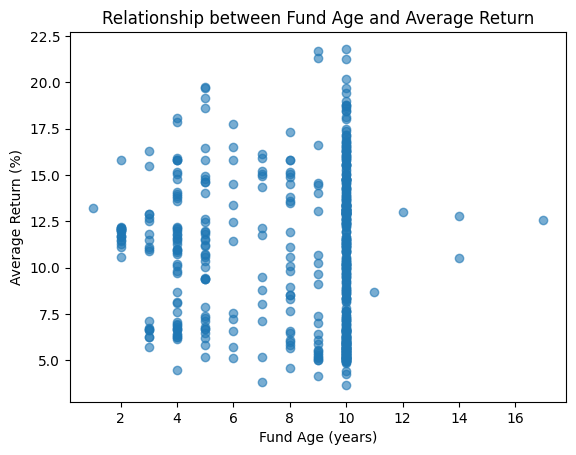

In [224]:

# Correlation check
correlation_age_return = df["fund_age_yr"].corr(df["avg_return"])
print("Correlation between Fund Age and Avg Return:", correlation_age_return)

# Visualization
plt.scatter(df["fund_age_yr"], df["avg_return"], alpha=0.6)
plt.xlabel("Fund Age (years)")
plt.ylabel("Average Return (%)")
plt.title("Relationship between Fund Age and Average Return")
plt.show()

In [225]:

correlation_efficiency_return5 = df["age_efficiency"].corr(df["returns_5yr"])
print("Correlation between Age Efficiency and 5-Year Returns:", correlation_efficiency_return5)

Correlation between Age Efficiency and 5-Year Returns: 0.28624149638257246


In [226]:

oldest_funds = df.nlargest(10, "fund_age_yr")[["scheme_name", "fund_age_yr", "avg_return", "returns_5yr", "performance_score"]]
print(oldest_funds)

                                           scheme_name  fund_age_yr  \
614                Quantum Long Term Equity Value Fund           17   
611                                Quantum Equity Fund           14   
616                            Quantum Tax Saving Fund           14   
612                          Quantum Gold Savings Fund           12   
615                           Quantum Multi Asset Fund           11   
1                       Aditya Birla SL Arbitrage Fund           10   
2       Aditya Birla SL Asset Allocator FoF Dir Growth           10   
4              Aditya Birla SL Balanced Advantage Fund           10   
7    Aditya Birla SL CEF   Global Agri Plan Direct ...           10   
11                 Aditya Birla SL Dividend Yield Fund           10   

     avg_return  returns_5yr  performance_score  
614   12.566667          8.8           6.259667  
611   10.500000          9.1             4.5825  
616   12.800000          8.9              6.448  
612   13.000000   

In [227]:

new_funds = df[df["fund_age_yr"] < 3]["avg_return"].mean()
old_funds = df[df["fund_age_yr"] >= 3]["avg_return"].mean()

print(f"Average Return (New Funds <3 yrs): {new_funds:.2f}")
print(f"Average Return (Old Funds >=3 yrs): {old_funds:.2f}")

if new_funds > old_funds:
    print("➡️ New funds are performing better than older funds.")
else:
    print("⬅️ Older funds are giving better returns.")

Average Return (New Funds <3 yrs): 12.03
Average Return (Old Funds >=3 yrs): 10.65
➡️ New funds are performing better than older funds.


In [228]:

df["overall_score"] = (
    df["performance_score"] + 
    df["popularity_score"] + 
    df["risk_adjusted_score"]
)

# Top 10 overall best funds
top10_overall = df.nlargest(10, "overall_score")[[
    "scheme_name", "amc_name", "category", "overall_score", 
    "performance_score", "popularity_score", "risk_adjusted_score"
]]
print(top10_overall)

                               scheme_name                        amc_name  \
594   PGIM India Midcap Opportunities Fund          PGIM India Mutual Fund   
522              Motilal Oswal Midcap Fund       Motilal Oswal Mutual Fund   
234                   HDFC Focused 30 Fund                HDFC Mutual Fund   
322       ICICI Pru Large and Mid Cap Fund    ICICI Prudential Mutual Fund   
219  Franklin India Smaller Companies Fund  Franklin Templeton Mutual Fund   
654                 SBI Magnum Midcap Fund                 SBI Mutual Fund   
226              HDFC Children’s Gift Fund                HDFC Mutual Fund   
198              Franklin Build India Fund  Franklin Templeton Mutual Fund   
294                        HSBC Value Fund                HSBC Mutual Fund   
244            HDFC Large and Mid Cap Fund                HDFC Mutual Fund   

              category  overall_score  performance_score  popularity_score  \
594             Equity      25.931384            11.9165       

In [229]:

amc_overall = (
    df.groupby("amc_name")["overall_score"]
    .mean()
    .reset_index()
    .sort_values(by="overall_score", ascending=False)
)
print(amc_overall)

                             amc_name  overall_score
27                  Quant Mutual Fund      21.210878
9                    HDFC Mutual Fund      17.803783
18         Kotak Mahindra Mutual Fund      17.697515
11       ICICI Prudential Mutual Fund      17.635873
8      Franklin Templeton Mutual Fund      17.541407
13                   IIFL Mutual Fund      17.271381
29                    SBI Mutual Fund      17.086807
25           Nippon India Mutual Fund      16.773369
19                    L&T Mutual Fund      16.764886
32                   Tata Mutual Fund      16.755253
23          Motilal Oswal Mutual Fund      16.662124
35                    UTI Mutual Fund      16.641206
31               Sundaram Mutual Fund      16.577233
7               Edelweiss Mutual Fund      16.305992
22            Mirae Asset Mutual Fund      16.180842
21      Mahindra Manulife Mutual Fund      15.599861
16                Invesco Mutual Fund      15.582505
0   Aditya Birla Sun Life Mutual Fund      15.

In [230]:

top_fund_per_category = (
    df.loc[df.groupby("category")["avg_return"].idxmax(), 
           ["category", "scheme_name", "avg_return", "performance_score"]]
    .sort_values(by="avg_return", ascending=False)
)
print(top_fund_per_category)

              category                        scheme_name  avg_return  \
198             Equity          Franklin Build India Fund   21.800000   
348              Other  ICICI Pru Thematic Advantage Fund   18.466667   
226  Solution Oriented          HDFC Children’s Gift Fund   16.733333   
420             Hybrid              JM Equity Hybrid Fund   16.233333   
267               Debt           HSBC Corporate Bond Fund   15.800000   

     performance_score  
198             11.974  
348          10.263667  
226           9.878333  
420           9.337833  
267             6.9625  


                      min_sip  min_lumpsum  expense_ratio  fund_size_cr  \
min_sip              1.000000     0.195422      -0.116495     -0.069817   
min_lumpsum          0.195422     1.000000      -0.007353     -0.000200   
expense_ratio       -0.116495    -0.007353       1.000000     -0.106584   
fund_size_cr        -0.069817    -0.000200      -0.106584      1.000000   
fund_age_yr         -0.071197     0.032817       0.185354      0.215314   
sortino              0.004677    -0.014356       0.047893      0.169828   
alpha               -0.081816     0.062184       0.045186      0.171510   
sd                  -0.142693    -0.130267       0.481062     -0.021017   
beta                 0.039348    -0.039006      -0.041772      0.024333   
sharpe              -0.085992    -0.016250       0.103409      0.256465   
risk_level          -0.186652    -0.144654       0.526248      0.021908   
rating              -0.021283     0.071016      -0.209768      0.208214   
returns_1yr         -0.03

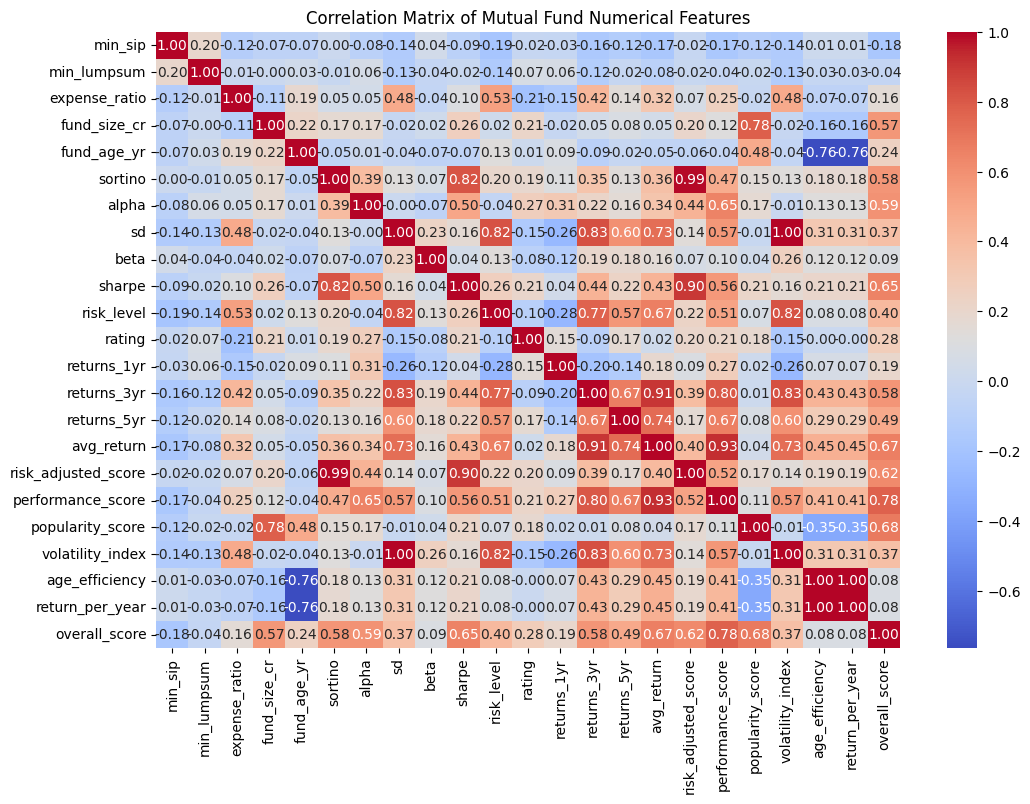

In [231]:

numeric_df = df.select_dtypes(include=["int64", "float64"])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Display matrix
print(corr_matrix)

# Visualization (Heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Mutual Fund Numerical Features")
plt.show()

In [232]:

correlations = corr_matrix["avg_return"].sort_values(ascending=False)
print(correlations.head(6))  # top 6 including self

avg_return           1.000000
performance_score    0.928109
returns_3yr          0.909752
returns_5yr          0.739367
sd                   0.727357
volatility_index     0.726857
Name: avg_return, dtype: float64


Correlation between Volatility Index and Risk Adjusted Score: 0.1432121119259172


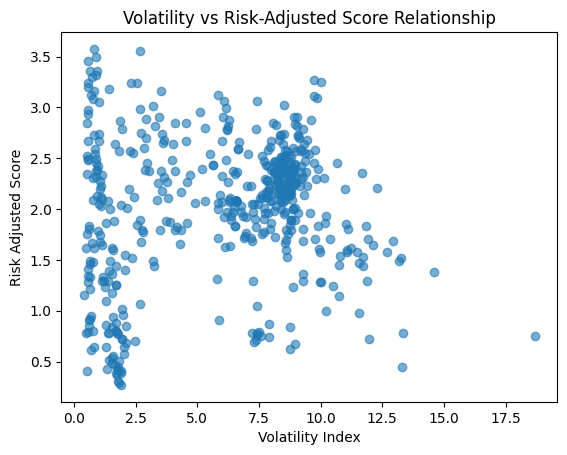

In [233]:

correlation_vol_risk = df["volatility_index"].corr(df["risk_adjusted_score"])
print("Correlation between Volatility Index and Risk Adjusted Score:", correlation_vol_risk)

# Scatter plot for visual relationship
plt.scatter(df["volatility_index"], df["risk_adjusted_score"], alpha=0.6)
plt.xlabel("Volatility Index")
plt.ylabel("Risk Adjusted Score")
plt.title("Volatility vs Risk-Adjusted Score Relationship")
plt.show()

In [234]:
mutual_funds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [235]:
df.columns

Index(['scheme_name', 'min_sip', 'min_lumpsum', 'expense_ratio',
       'fund_size_cr', 'fund_age_yr', 'fund_manager', 'sortino', 'alpha', 'sd',
       'beta', 'sharpe', 'risk_level', 'amc_name', 'rating', 'category',
       'sub_category', 'returns_1yr', 'returns_3yr', 'returns_5yr',
       'avg_return', 'risk_adjusted_score', 'performance_score',
       'popularity_score', 'volatility_index', 'age_efficiency',
       'return_per_year', 'overall_score'],
      dtype='object')

In [236]:
for column in df.columns:
    print(column)

scheme_name
min_sip
min_lumpsum
expense_ratio
fund_size_cr
fund_age_yr
fund_manager
sortino
alpha
sd
beta
sharpe
risk_level
amc_name
rating
category
sub_category
returns_1yr
returns_3yr
returns_5yr
avg_return
risk_adjusted_score
performance_score
popularity_score
volatility_index
age_efficiency
return_per_year
overall_score


In [237]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,...,returns_3yr,returns_5yr,avg_return,risk_adjusted_score,performance_score,popularity_score,volatility_index,age_efficiency,return_per_year,overall_score
1,Aditya Birla SL Arbitrage Fund,1000.0,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.530,0.72,...,4.8,5.5,5.300000,1.215,3.3005,10.363576,0.640,0.53,0.53,14.879076
2,Aditya Birla SL Asset Allocator FoF Dir Growth,1000.0,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.670,10.58,...,18.9,9.7,10.200000,2.430,5.724,7.056246,5.625,1.02,1.02,15.210246
4,Aditya Birla SL Balanced Advantage Fund,100.0,100,0.61,6386.0,10,Mohit Sharma,3.69,1.990,10.38,...,18.6,9.7,10.933333,2.540,6.024333,10.761863,5.530,1.093333,1.093333,19.326197
5,Aditya Birla SL Banking and Financial Services...,1000.0,1000,1.17,2384.0,9,Dhaval Gala,2.07,1.240,25.53,...,24.6,9.2,13.033333,1.520,6.137333,9.576535,13.245,1.448148,1.448148,17.233868
7,Aditya Birla SL CEF Global Agri Plan Direct ...,1000.0,1000,1.29,15.0,10,Vinod Narayan Bhat,1.42,1.855,20.18,...,29.4,9.3,9.466667,1.240,5.067167,4.70805,10.520,0.946667,0.946667,11.015217


In [238]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,...,returns_3yr,returns_5yr,avg_return,risk_adjusted_score,performance_score,popularity_score,volatility_index,age_efficiency,return_per_year,overall_score
1,Aditya Birla SL Arbitrage Fund,1000.0,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.530,0.72,...,4.8,5.5,5.300000,1.215,3.3005,10.363576,0.640,0.53,0.53,14.879076
2,Aditya Birla SL Asset Allocator FoF Dir Growth,1000.0,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.670,10.58,...,18.9,9.7,10.200000,2.430,5.724,7.056246,5.625,1.02,1.02,15.210246
4,Aditya Birla SL Balanced Advantage Fund,100.0,100,0.61,6386.0,10,Mohit Sharma,3.69,1.990,10.38,...,18.6,9.7,10.933333,2.540,6.024333,10.761863,5.530,1.093333,1.093333,19.326197
5,Aditya Birla SL Banking and Financial Services...,1000.0,1000,1.17,2384.0,9,Dhaval Gala,2.07,1.240,25.53,...,24.6,9.2,13.033333,1.520,6.137333,9.576535,13.245,1.448148,1.448148,17.233868
7,Aditya Birla SL CEF Global Agri Plan Direct ...,1000.0,1000,1.29,15.0,10,Vinod Narayan Bhat,1.42,1.855,20.18,...,29.4,9.3,9.466667,1.240,5.067167,4.70805,10.520,0.946667,0.946667,11.015217


In [239]:
df["volatility_index"].dtype

dtype('float64')

In [240]:
df["age_efficiency"].dtype

Float64Dtype()

In [241]:
df["risk_level"].max()

np.int64(6)

In [242]:
X = df[['min_sip', 'min_lumpsum', 'expense_ratio', 'fund_size_cr', 'fund_age_yr',
        'sortino', 'alpha', 'sd', 'beta', 'sharpe', 'risk_level', 'rating',
        'volatility_index', 'age_efficiency']]

In [243]:
y = df[['avg_return']]

In [244]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [245]:


scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [258]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Step 1: Define all regression models correctly
models = {
    "Linear Regression": LinearRegression(),
    "Multiple Linear Regression": LinearRegression(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()), 
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Support Vector Machine Regression": SVR(),
    "KNN Regression": KNeighborsRegressor(),
    "AdaBoost Regression": AdaBoostRegressor(random_state=42),
    "XGBoost Regression": XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0),
    "LightGBM Regression": LGBMRegressor(random_state=42, verbose=-1),
    "Gradient Boosting Regression": GradientBoostingRegressor(random_state=42),
    "CatBoost Regression": CatBoostRegressor(verbose=0, random_state=42),
    "Random Forest Regression": RandomForestRegressor(random_state=42)
}




In [259]:
# Step 2: Train and evaluate all models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\n {name} Results:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")


 Linear Regression Results:
R² Score: 0.7324
MAE: 1.4291
RMSE: 2.1249

 Multiple Linear Regression Results:
R² Score: 0.7324
MAE: 1.4291
RMSE: 2.1249

 Polynomial Regression Results:
R² Score: 1.0000
MAE: 0.0000
RMSE: 0.0000

 Decision Tree Regression Results:
R² Score: 0.8111
MAE: 0.8217
RMSE: 1.7854

 Support Vector Machine Regression Results:
R² Score: 0.7822
MAE: 1.1765
RMSE: 1.9170

 KNN Regression Results:
R² Score: 0.6639
MAE: 1.4234
RMSE: 2.3812

 AdaBoost Regression Results:
R² Score: 0.8659
MAE: 1.1038
RMSE: 1.5041

 XGBoost Regression Results:
R² Score: 0.8990
MAE: 0.6169
RMSE: 1.3052

 LightGBM Regression Results:
R² Score: 0.9115
MAE: 0.5650
RMSE: 1.2217

 Gradient Boosting Regression Results:
R² Score: 0.9112
MAE: 0.6476
RMSE: 1.2239

 CatBoost Regression Results:
R² Score: 0.9164
MAE: 0.5840
RMSE: 1.1877

 Random Forest Regression Results:
R² Score: 0.8125
MAE: 0.7954
RMSE: 1.7785


In [248]:


# Initialize and train
cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train_scaled, y_train)


In [ ]:
#Save the trained CatBoost model
pickle.dump(cat_model, open("catboost_final_model.pkl", "wb"))

print("CatBoost Regression model saved successfully as 'catboost_final_model.pkl'")


In [ ]:
pickle.dump(scaler, open("scaler.pkl", "wb"))
print("RobustScaler saved successfully as 'scaler.pkl'")


In [ ]:
# Load saved model and scaler
loaded_model = pickle.load(open("catboost_final_model.pkl", "rb"))
loaded_scaler = pickle.load(open("scaler.pkl", "rb"))

In [ ]:
# Example: New mutual fund data
#new_data = [[500, 5000, 1.2, 1500, 8, 1.1, 3.5, 10, 0.9, 1.2, 2, 4, 0.8, 0.65]]

# Step 1: Scale the new input data
#new_data_scaled = loaded_scaler.transform(new_data)

# Step 2: Predict average return
#predicted_return = loaded_model.predict(new_data_scaled)

#print("Predicted Average Return (%):", round(predicted_return[0], 2))

In [256]:
import numpy
import pandas
import matplotlib
import seaborn
import sklearn
import xgboost
import lightgbm
import catboost
import flask

print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", seaborn.__version__)
print("scikit-learn:", sklearn.__version__)
print("xgboost:", xgboost.__version__)
print("lightgbm:", lightgbm.__version__)
print("catboost:", catboost.__version__)
print("flask:", flask.__version__)


numpy: 2.2.6
pandas: 2.3.3
matplotlib: 3.10.7
seaborn: 0.13.2
scikit-learn: 1.7.2
xgboost: 3.1.1
lightgbm: 4.6.0
catboost: 1.2.8
flask: 3.1.2
